# SC1015 A133 Group 6 - Mini Project

This project is aims to accurately predict whether a patient will have stroke based on some common factors amongst stroke patients. The dataset is from Kaggle. In this notebook, you will find the complete analysis we had done for this project. <br>
This notebook contains <br> 
- Data Preprocessing 
- Exploratory Data Analysis (EDA)
- Models to predict stroke (Logistic Regression, Random Forest & Artificial Neural Network)

Along the way, you will find descriptions to the specific code segment as well as our insights gained from the different EDA and AI models. A more concrete explanation will be presented in our video presentation.

In [1]:
# Importing the necessary packages
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import plot_tree
from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb


In [2]:
np.random.seed(100)

In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Observations on dataset:

- There are **12** variables and **5110** observations in the dataset.
- The response variable is **stroke**, while the remaining (except for ID) are predictors.
- BMI and age are **numeric** while the other variables are **categorical**.
- There are only 4909 non-null entries for BMI but the total number of samples is 5110. Therefore, data cleaning is required to remove the entries that are specified as 'N/A'.

# Overview
Looking at our dataset, we realise that there are only 4909 non-null entries for BMI.

Therefore we would have to do some data cleaning to remove the entries that are specified as 'N/A'.

For entries on smoking_status, we also realise there are entries that are categorised as "Unknown". We will be removing these entries from our data set as well.

In [4]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [5]:
print(data['stroke'].value_counts())

0    4700
1     209
Name: stroke, dtype: int64


In [6]:
data.describe()

id          age  hypertension  heart_disease  \
count   4909.000000  4909.000000   4909.000000    4909.000000   
mean   37064.313506    42.865374      0.091872       0.049501   
std    20995.098457    22.555115      0.288875       0.216934   
min       77.000000     0.080000      0.000000       0.000000   
25%    18605.000000    25.000000      0.000000       0.000000   
50%    37608.000000    44.000000      0.000000       0.000000   
75%    55220.000000    60.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        4909.000000  4909.000000  4909.000000  
mean          105.305150    28.893237     0.042575  
std            44.424341     7.854067     0.201917  
min            55.120000    10.300000     0.000000  
25%            77.070000    23.500000     0.000000  
50%            91.680000    28.100000     0.000000  
75%           113.570000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [7]:
data.to_csv('cleaned-dataset.csv',index=False)

# Exploratory Data Analysis

Explore the response variable, **stroke**

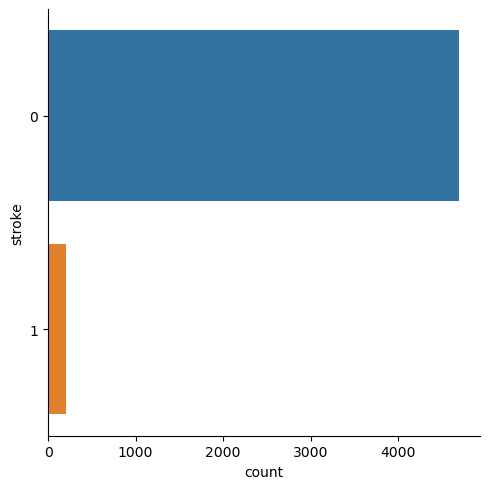

In [8]:
sb.catplot(y = 'stroke', data = data, kind = "count")

In [9]:
countN, countY = data['stroke'].value_counts()
print("The ratio of classes is Stroke : No Stroke = ",countY,":",countN)

The ratio of classes is Stroke : No Stroke =  209 : 4700


Analyse numeric variables: Age and BMI

In [10]:
data[['age','bmi','avg_glucose_level']].describe()

age          bmi  avg_glucose_level
count  4909.000000  4909.000000        4909.000000
mean     42.865374    28.893237         105.305150
std      22.555115     7.854067          44.424341
min       0.080000    10.300000          55.120000
25%      25.000000    23.500000          77.070000
50%      44.000000    28.100000          91.680000
75%      60.000000    33.100000         113.570000
max      82.000000    97.600000         271.740000

In [11]:
data[['hypertension','heart_disease']].describe()

hypertension  heart_disease
count   4909.000000    4909.000000
mean       0.091872       0.049501
std        0.288875       0.216934
min        0.000000       0.000000
25%        0.000000       0.000000
50%        0.000000       0.000000
75%        0.000000       0.000000
max        1.000000       1.000000

In [12]:
data[['ever_married','work_type','gender','Residence_type','smoking_status']].describe()

ever_married work_type  gender Residence_type smoking_status
count          4909      4909    4909           4909           4909
unique            2         5       3              2              4
top             Yes   Private  Female          Urban   never smoked
freq           3204      2811    2897           2490           1852

<Figure size 2000x800 with 0 Axes>

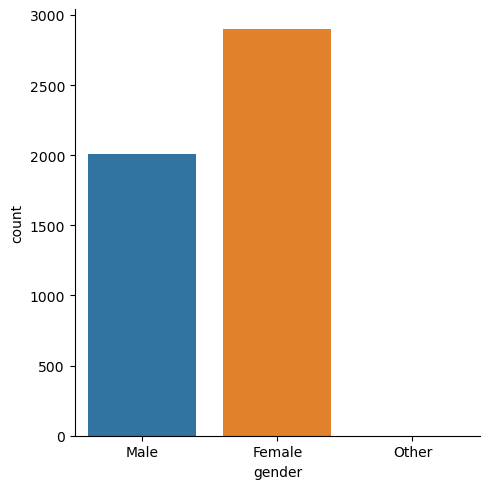

In [13]:
f = plt.figure(figsize=(20,8))
sb.catplot(x = 'gender', data=data, kind="count")
plt.show()

posx and posy should be finite values
posx and posy should be finite values


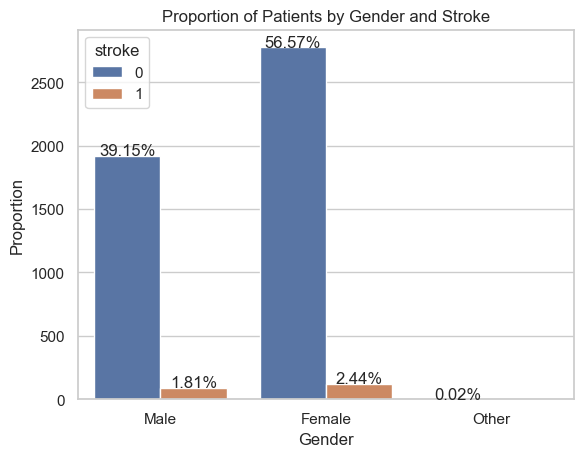

In [14]:
sb.set(style="whitegrid")
total = float(len(data))
ax = sb.countplot(x="gender", hue="stroke", data=data)
ax.set_title("Proportion of Patients by Gender and Stroke")
ax.set_xlabel("Gender")
ax.set_ylabel("Proportion")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format(height/total*100),
            ha="center")

plt.show()

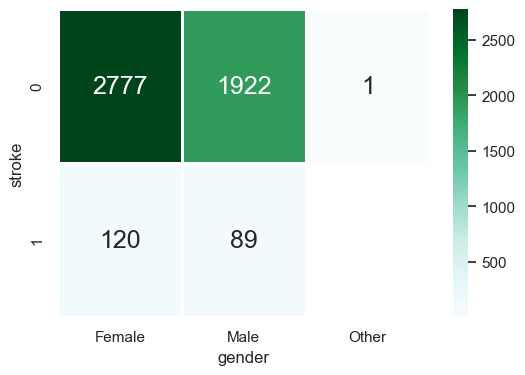

In [15]:
#Comparing gender with stroke
f = plt.figure(figsize=(6, 4))
sb.heatmap(data.groupby(['stroke', 'gender']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.show()

# Observations on gender
5% of females in the dataset had a stroke, while 5.6% of males in the dataset had a stroke. Even though there are more females, both genders have the same proportion who suffer from a stroke, which may suggest that there might not be a relationship between stroke and gender

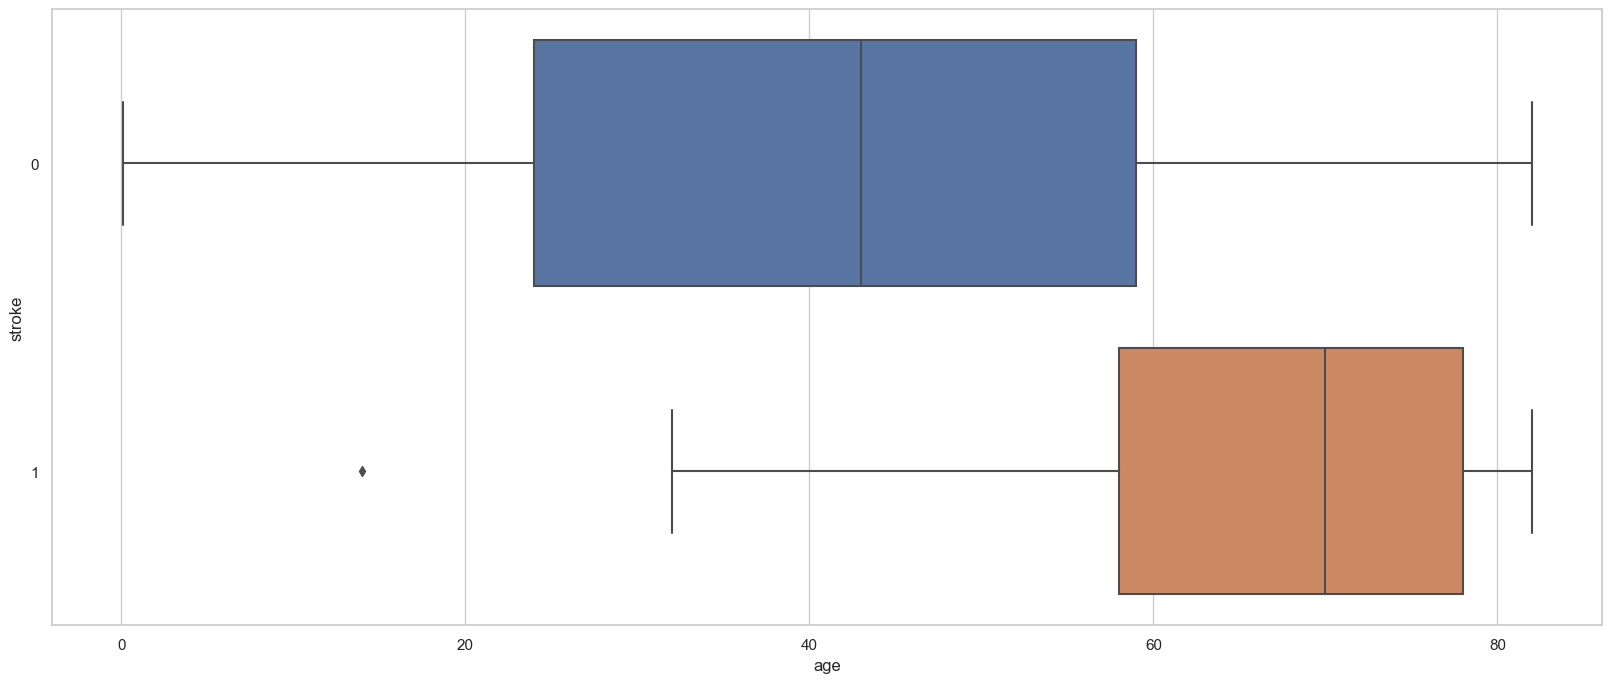

In [16]:
f = plt.figure(figsize=(20,8))
sb.boxplot(x='age',y='stroke',data=data,orient="h")
plt.show()

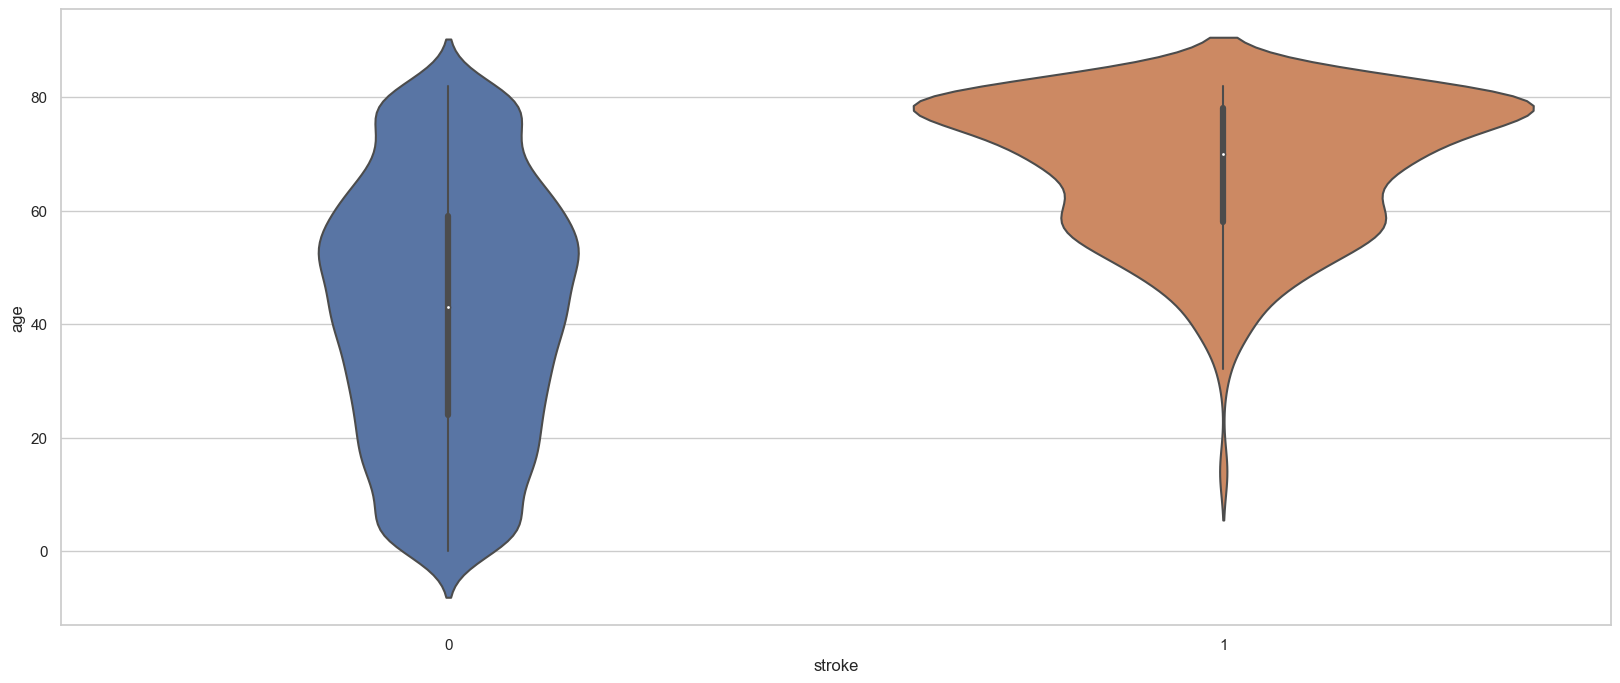

In [17]:
f = plt.figure(figsize=(20,8))
sb.violinplot(x='stroke',y='age',data=data)
plt.show()

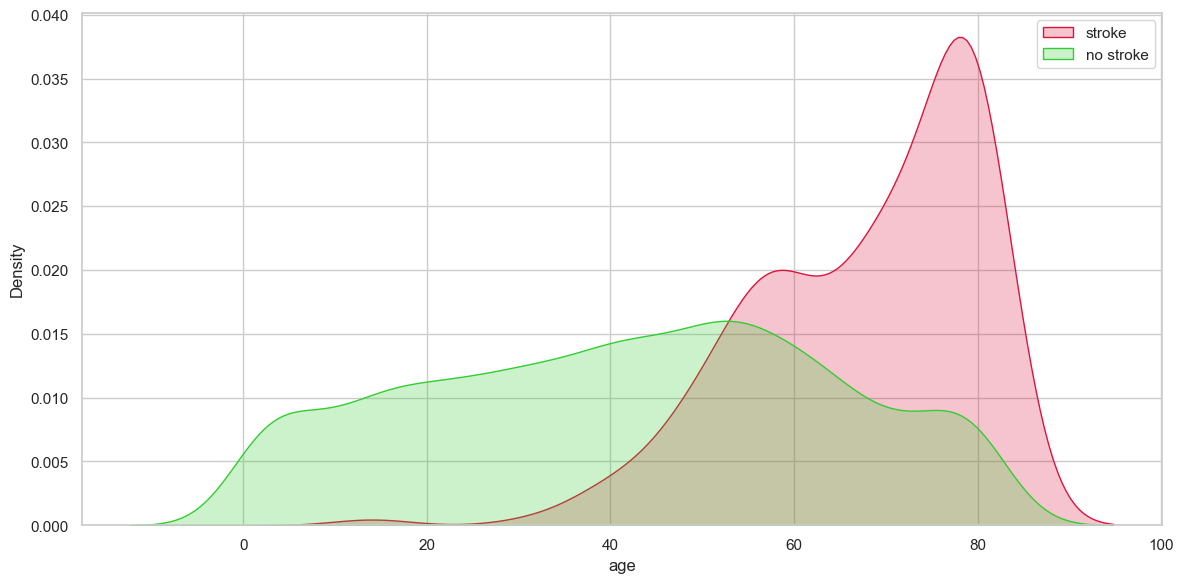

In [18]:
#Looking at proportion of age with stroke
fig, ax = plt.subplots(figsize=(12, 6))
sb.kdeplot(data=data[data.stroke==1], x='age',
            color='crimson', label='stroke', fill=True, ax=ax)
sb.kdeplot(data=data[data.stroke==0], x='age',
            color='limegreen', label='no stroke', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

# Observations on 'Age'
Based on the violinplot for patients with stroke, the plot is skewed towards patients with higher age, suggesting that patients with stroke tend to be of higher age. Furthermore, the shapes of the 2 violin plots are vastly different, as patients without stroke are mostly spread out among different age groups, whereas patients with stroke tend to skew towards those with higher age. Finally, the minimum age for patients with stroke is above 30 years old.

<Figure size 2000x800 with 0 Axes>

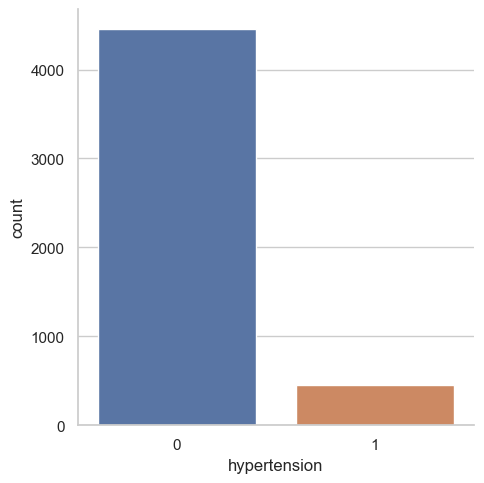

In [19]:
f = plt.figure(figsize=(20,8))
sb.catplot(x = 'hypertension', data=data, kind="count")
plt.show()

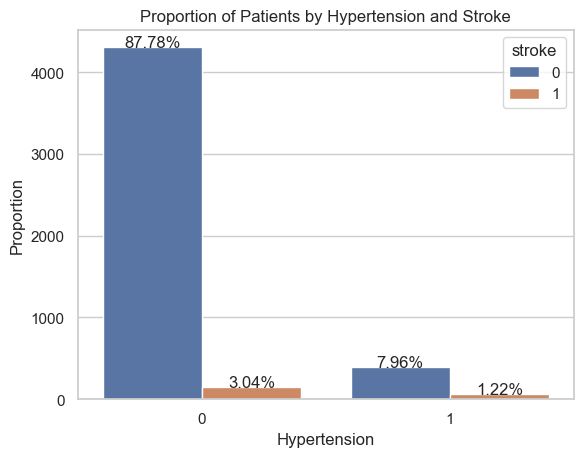

In [20]:
sb.set(style="whitegrid")
total = float(len(data))
ax = sb.countplot(x="hypertension", hue="stroke", data=data)
ax.set_title("Proportion of Patients by Hypertension and Stroke")
ax.set_xlabel("Hypertension")
ax.set_ylabel("Proportion")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format(height/total*100),
            ha="center")

plt.show()

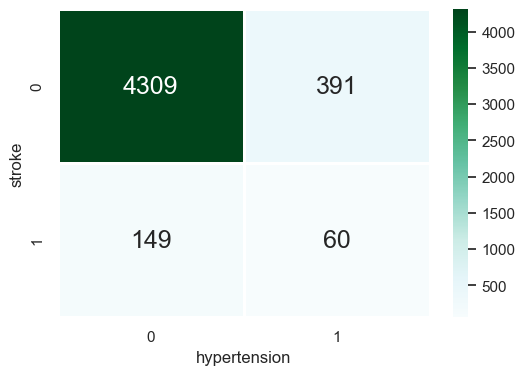

In [21]:
#Comparing hypertension with stroke
f = plt.figure(figsize=(6, 4))
sb.heatmap(data.groupby(['stroke', 'hypertension']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.show()

# Observations on hypertension
There are significantly more patients without hypertension. Among patients without hypertension, 4.1% suffer from a stroke, whereas 14% of patients with hypertension suffer from a stroke. There might be a relationship between hypertension and stroke, such that patients with hypertension are more likely to suffer from a stroke.

<Figure size 2000x800 with 0 Axes>

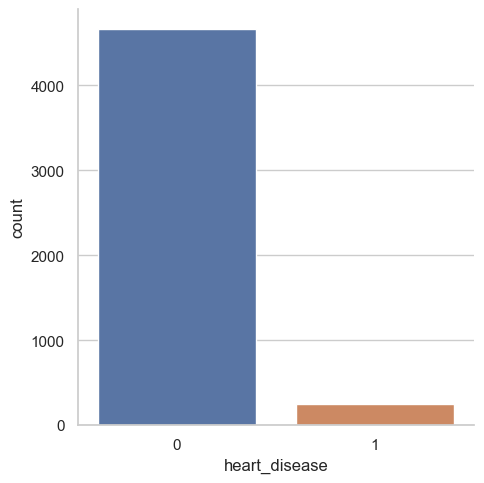

In [22]:
f = plt.figure(figsize=(20,8))
sb.catplot(x = 'heart_disease', data=data, kind="count")
plt.show()

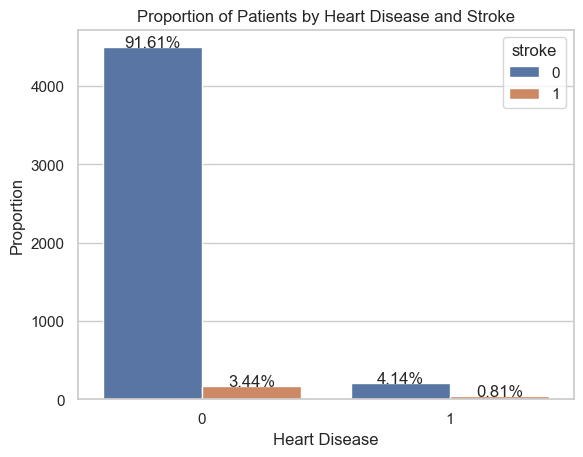

In [23]:
sb.set(style="whitegrid")
total = float(len(data))
ax = sb.countplot(x="heart_disease", hue="stroke", data=data)
ax.set_title("Proportion of Patients by Heart Disease and Stroke")
ax.set_xlabel("Heart Disease")
ax.set_ylabel("Proportion")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format(height/total*100),
            ha="center")

plt.show()

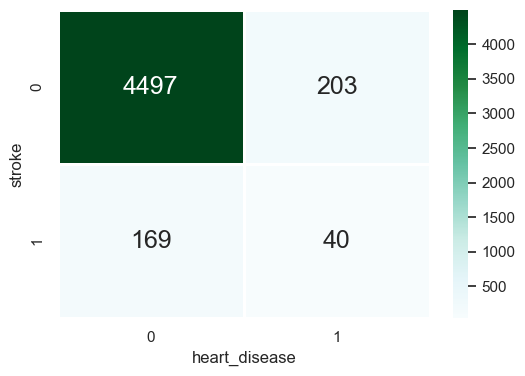

In [24]:
#Comparing heart disease with stroke
f = plt.figure(figsize=(6, 4))
sb.heatmap(data.groupby(['stroke', 'heart_disease']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.show()

# Observations on heart disease
Similar to hypertension, there is a higher proportion of patients who suffer from heart disease and has a stroke (17.5%) compared to those without heart disease and suffer from stroke (4.5%)

<Figure size 2000x800 with 0 Axes>

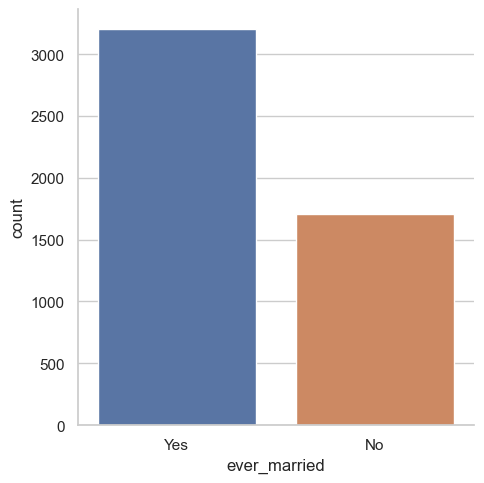

In [25]:
f = plt.figure(figsize=(20,8))
sb.catplot(x = 'ever_married', data=data, kind="count")
plt.show()

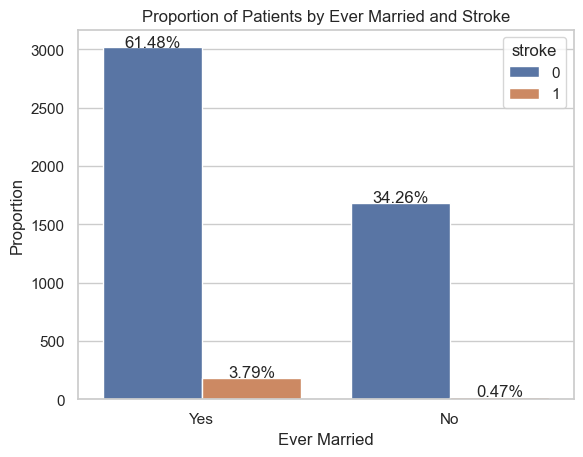

In [26]:
sb.set(style="whitegrid")
total = float(len(data))
ax = sb.countplot(x="ever_married", hue="stroke", data=data)
ax.set_title("Proportion of Patients by Ever Married and Stroke")
ax.set_xlabel("Ever Married")
ax.set_ylabel("Proportion")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format(height/total*100),
            ha="center")

plt.show()

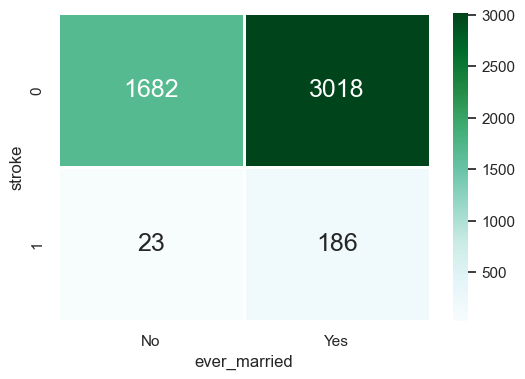

In [27]:
#Comparing ever married with stroke
f = plt.figure(figsize=(6, 4))
sb.heatmap(data.groupby(['stroke', 'ever_married']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.show()

# Observations on marriage
The proportion of patients that were ever married and suffered from a stroke (6.2%) is slightly higher than those who were never married and suffered from a stroke (2.4%)

<Figure size 2000x800 with 0 Axes>

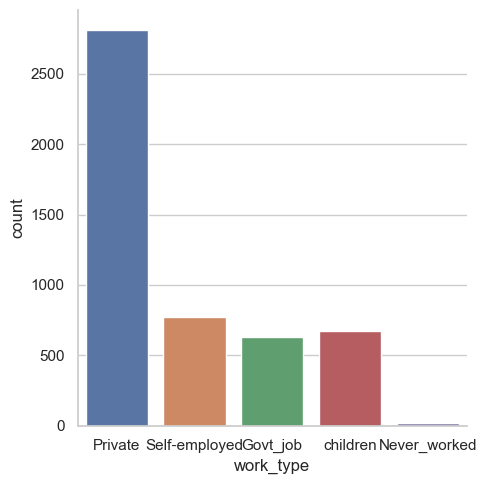

In [28]:
f = plt.figure(figsize=(20,8))
sb.catplot(x='work_type',data=data,kind="count")
plt.show()

posx and posy should be finite values
posx and posy should be finite values


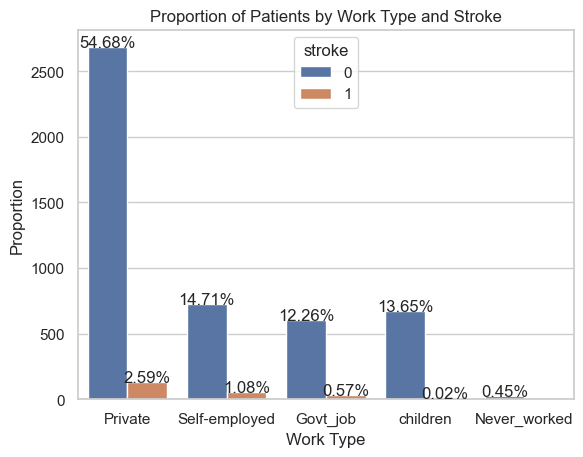

In [29]:
sb.set(style="whitegrid")
total = float(len(data))
ax = sb.countplot(x="work_type", hue="stroke", data=data)
ax.set_title("Proportion of Patients by Work Type and Stroke")
ax.set_xlabel("Work Type")
ax.set_ylabel("Proportion")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format(height/total*100),
            ha="center")

plt.show()

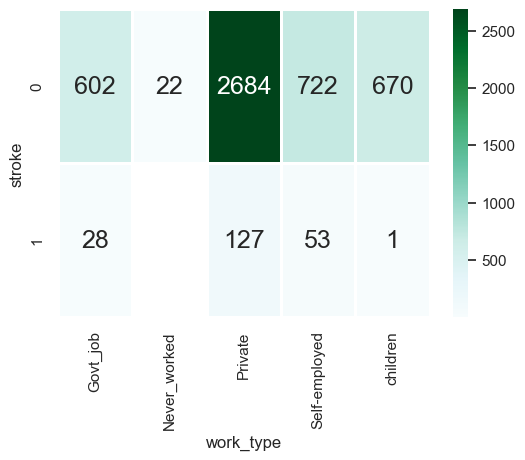

In [30]:
#Comparing work type with stroke
f = plt.figure(figsize=(6, 4))
sb.heatmap(data.groupby(['stroke', 'work_type']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.show()

# Observations on work type
The proportion of patients who have stroke and have government jobs and private workers are around 5%, while 7.6% of self employed patients suffer from a stroke. Hence, this may suggest that self-employed workers may be more likely to suffer from a stroke

<Figure size 2000x800 with 0 Axes>

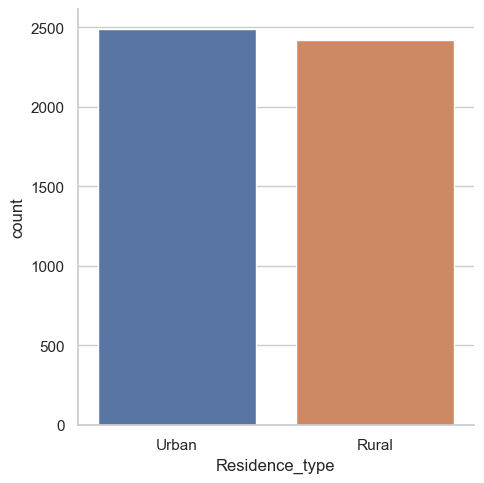

In [31]:
f = plt.figure(figsize=(20,8))
sb.catplot(x='Residence_type',data=data,kind="count")
plt.show()

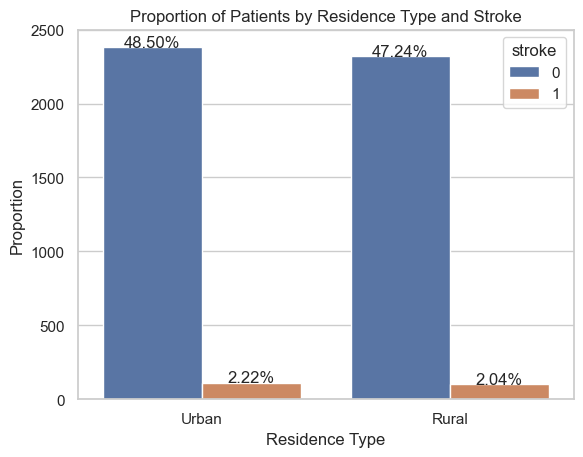

In [32]:
sb.set(style="whitegrid")
total = float(len(data))
ax = sb.countplot(x="Residence_type", hue="stroke", data=data)
ax.set_title("Proportion of Patients by Residence Type and Stroke")
ax.set_xlabel("Residence Type")
ax.set_ylabel("Proportion")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format(height/total*100),
            ha="center")

plt.show()

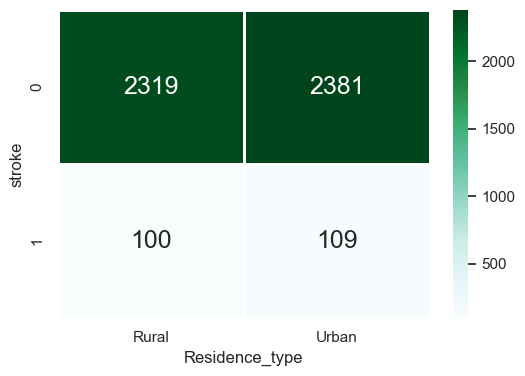

In [33]:
#Comparing residence type with stroke
f = plt.figure(figsize=(6, 4))
sb.heatmap(data.groupby(['stroke', 'Residence_type']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.show()

# Observations on residence type
There might not be a relationship between residence type as the proportion of patients who suffer from stroke regardless of their residence type is approximately 5%

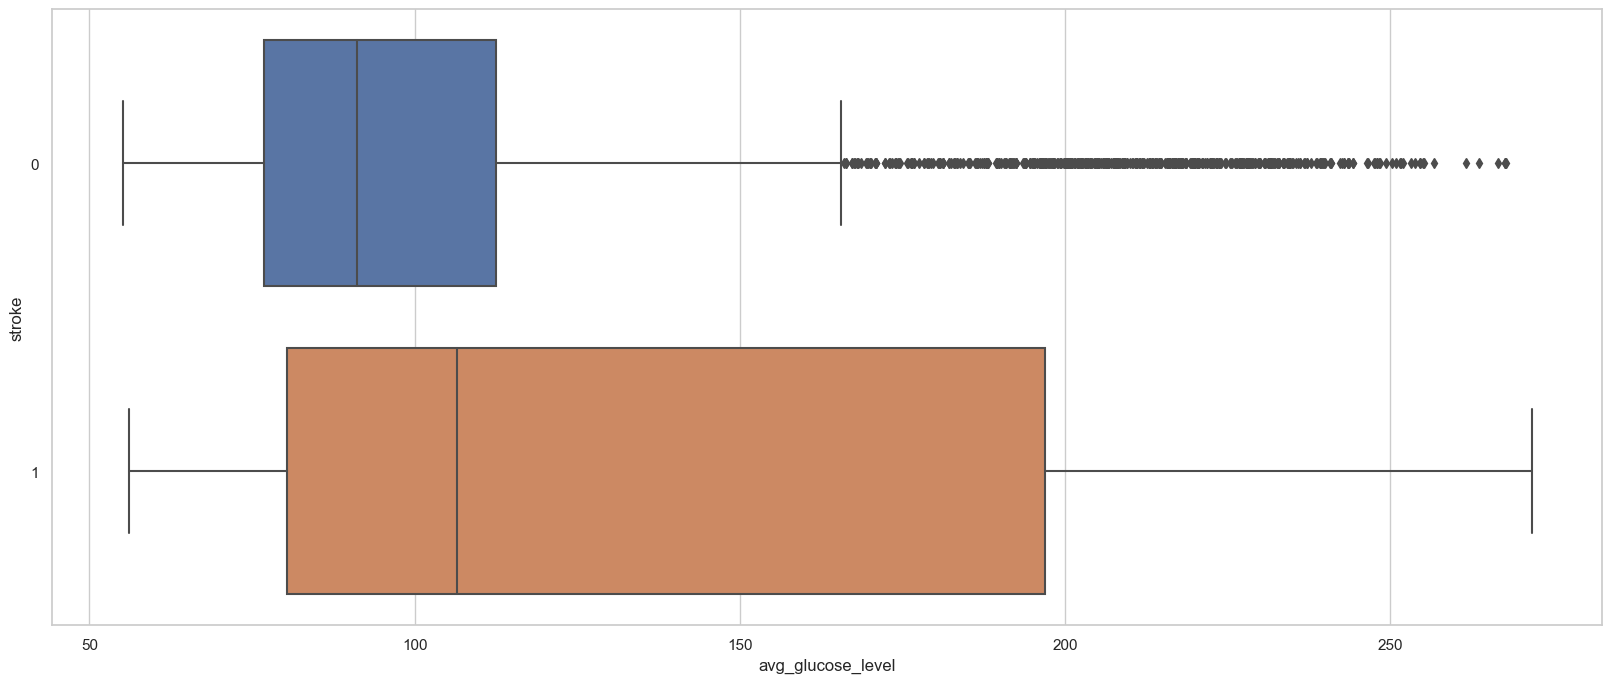

In [34]:
f = plt.figure(figsize=(20,8))
sb.boxplot(x='avg_glucose_level',y='stroke',data=data,orient="h")
plt.show()

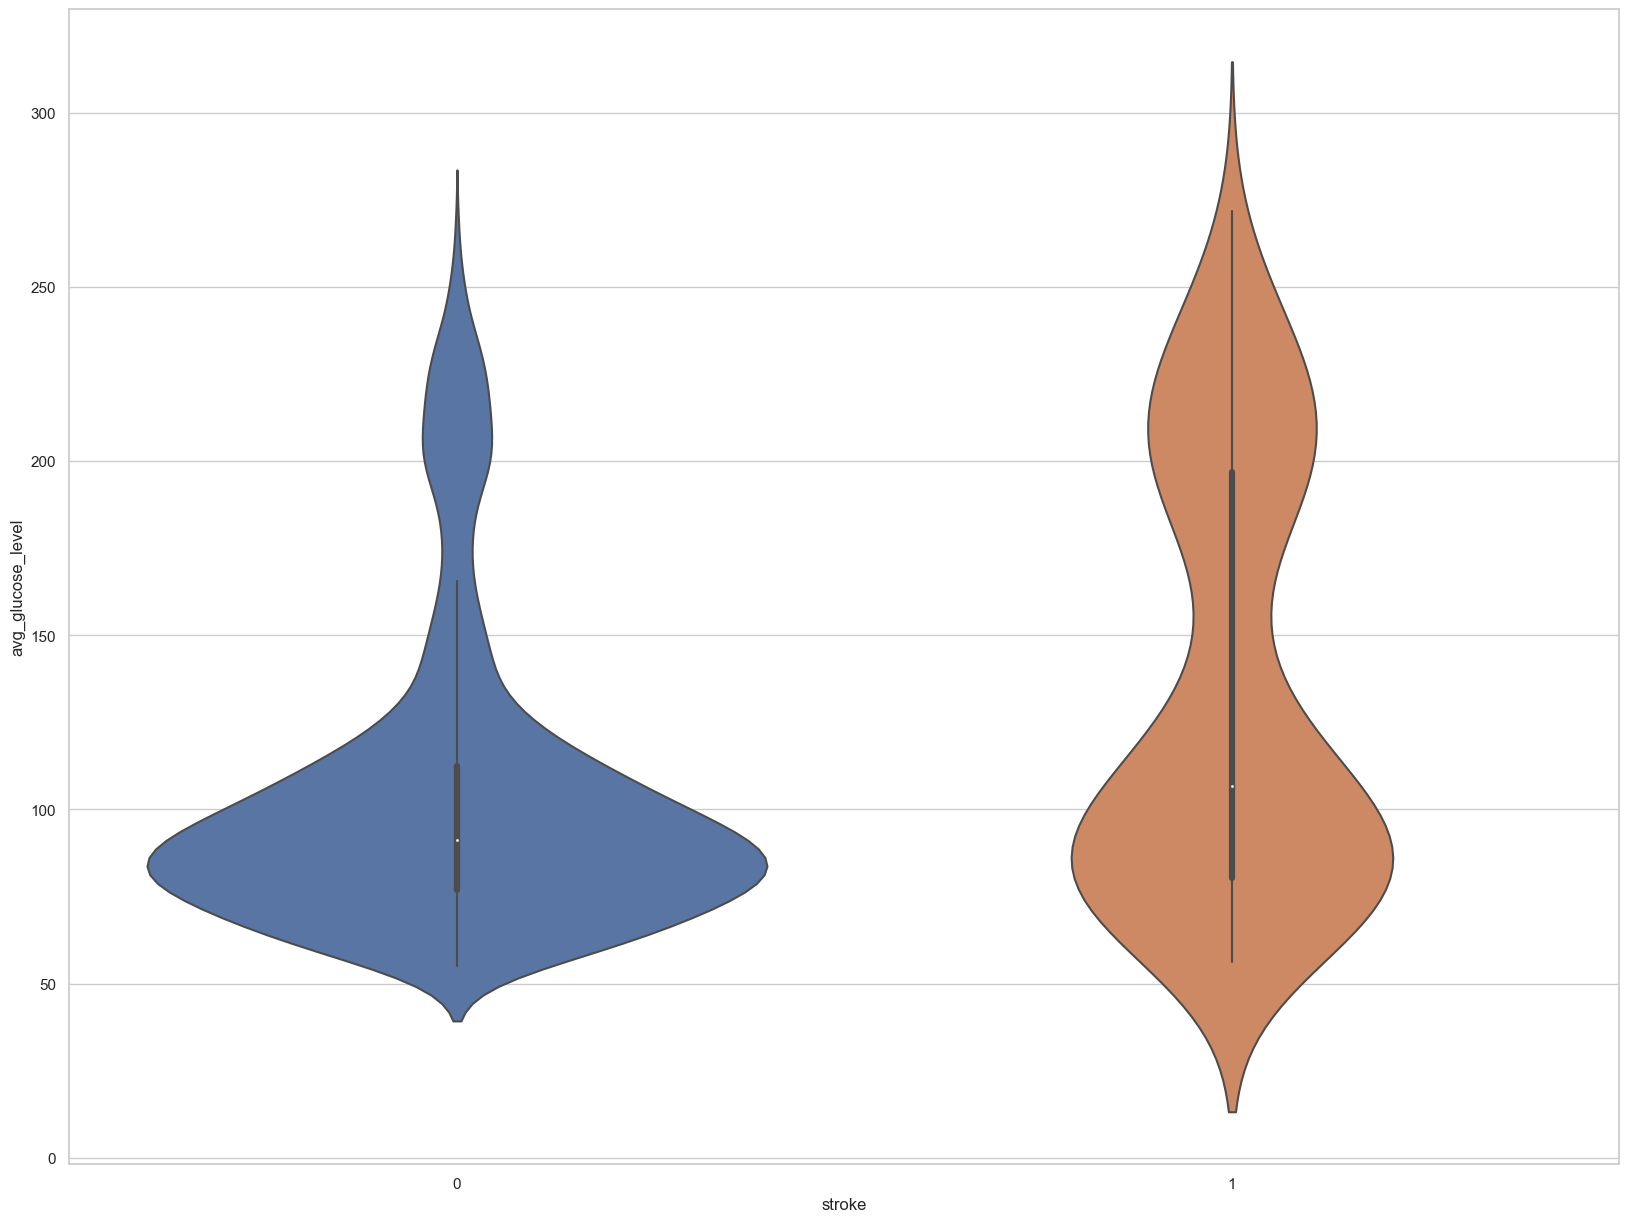

In [35]:
f = plt.figure(figsize=(20,15))
sb.violinplot(x='stroke',y='avg_glucose_level',data=data)
plt.show()

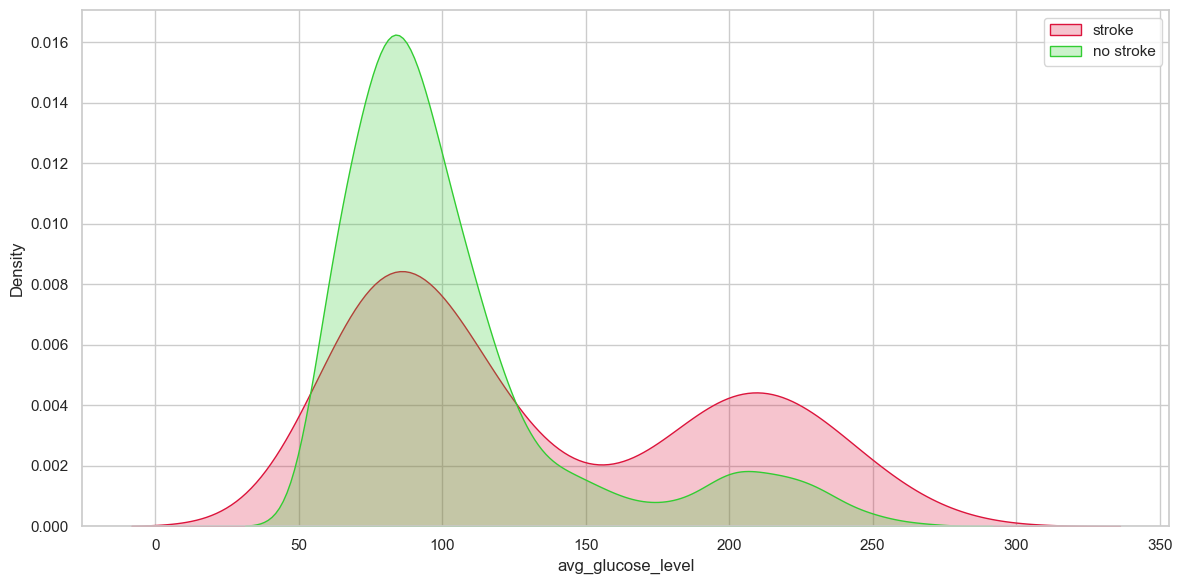

In [36]:
#Looking at proportiong of average glucose level with stroke
fig, ax = plt.subplots(figsize=(12, 6))
sb.kdeplot(data=data[data.stroke==1], x='avg_glucose_level',
            color='crimson', label='stroke', fill=True, ax=ax)
sb.kdeplot(data=data[data.stroke==0], x='avg_glucose_level',
            color='limegreen', label='no stroke', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

# Observations on average glucose levels
Based on the boxplot for average glucose levels, there is a significant number of anomalies for patients without stroke. Additionally, the violinplot for patients without stroke shows that majorty of patients have relatively lower average glucose levels. Removing the outliers is a common method used to reduce the impact of extreme cases. However, doing so will lead to a higher density of relatively lower average glucose levels, which may be misleading in suggesting that patients who do not have a stroke have lower average glucose levels, when it might not be the case.

On the other hand, for patients with stroke, their average glucose levels seem to be more spread out, without a region of glucose levels having a more significant density

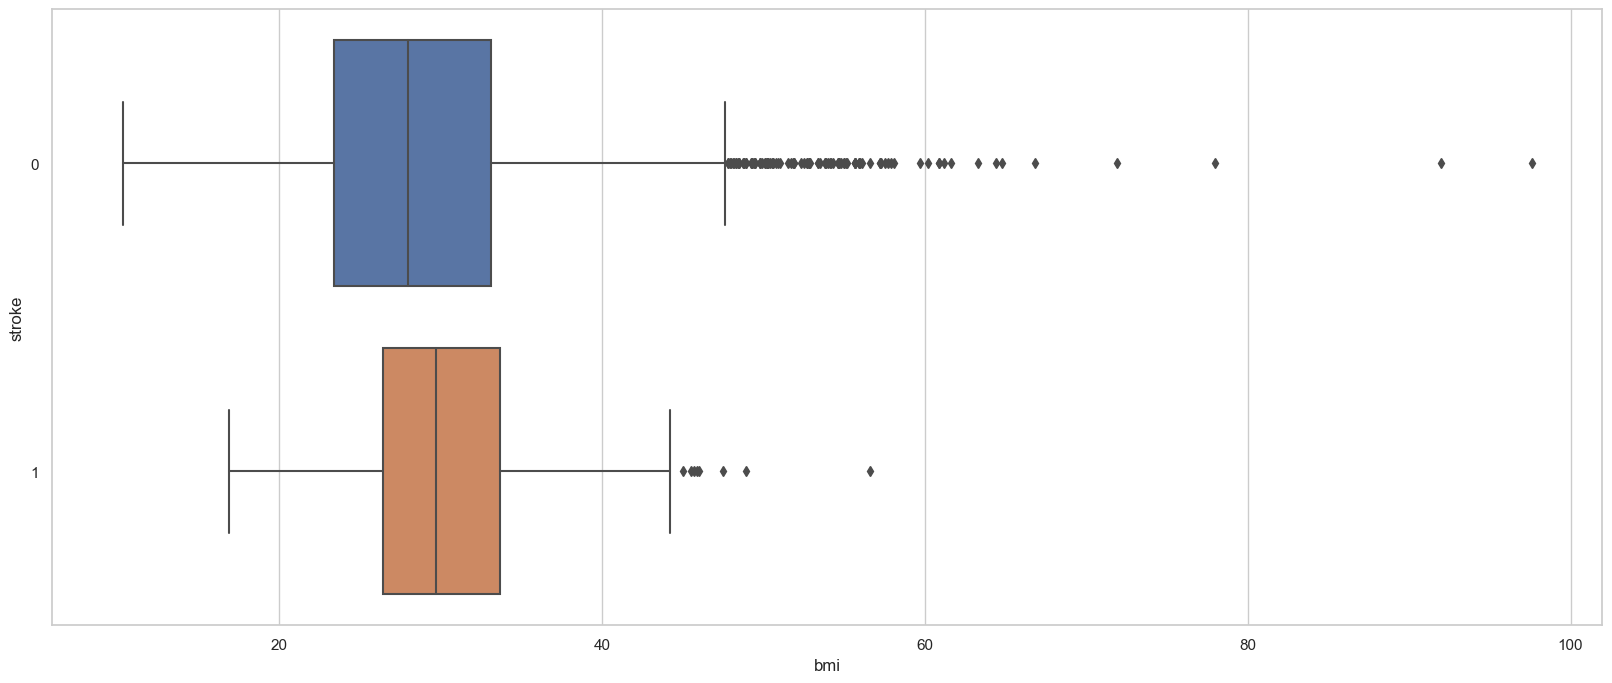

In [37]:
f = plt.figure(figsize=(20,8))
sb.boxplot(x='bmi',y='stroke',data=data,orient="h")
plt.show()

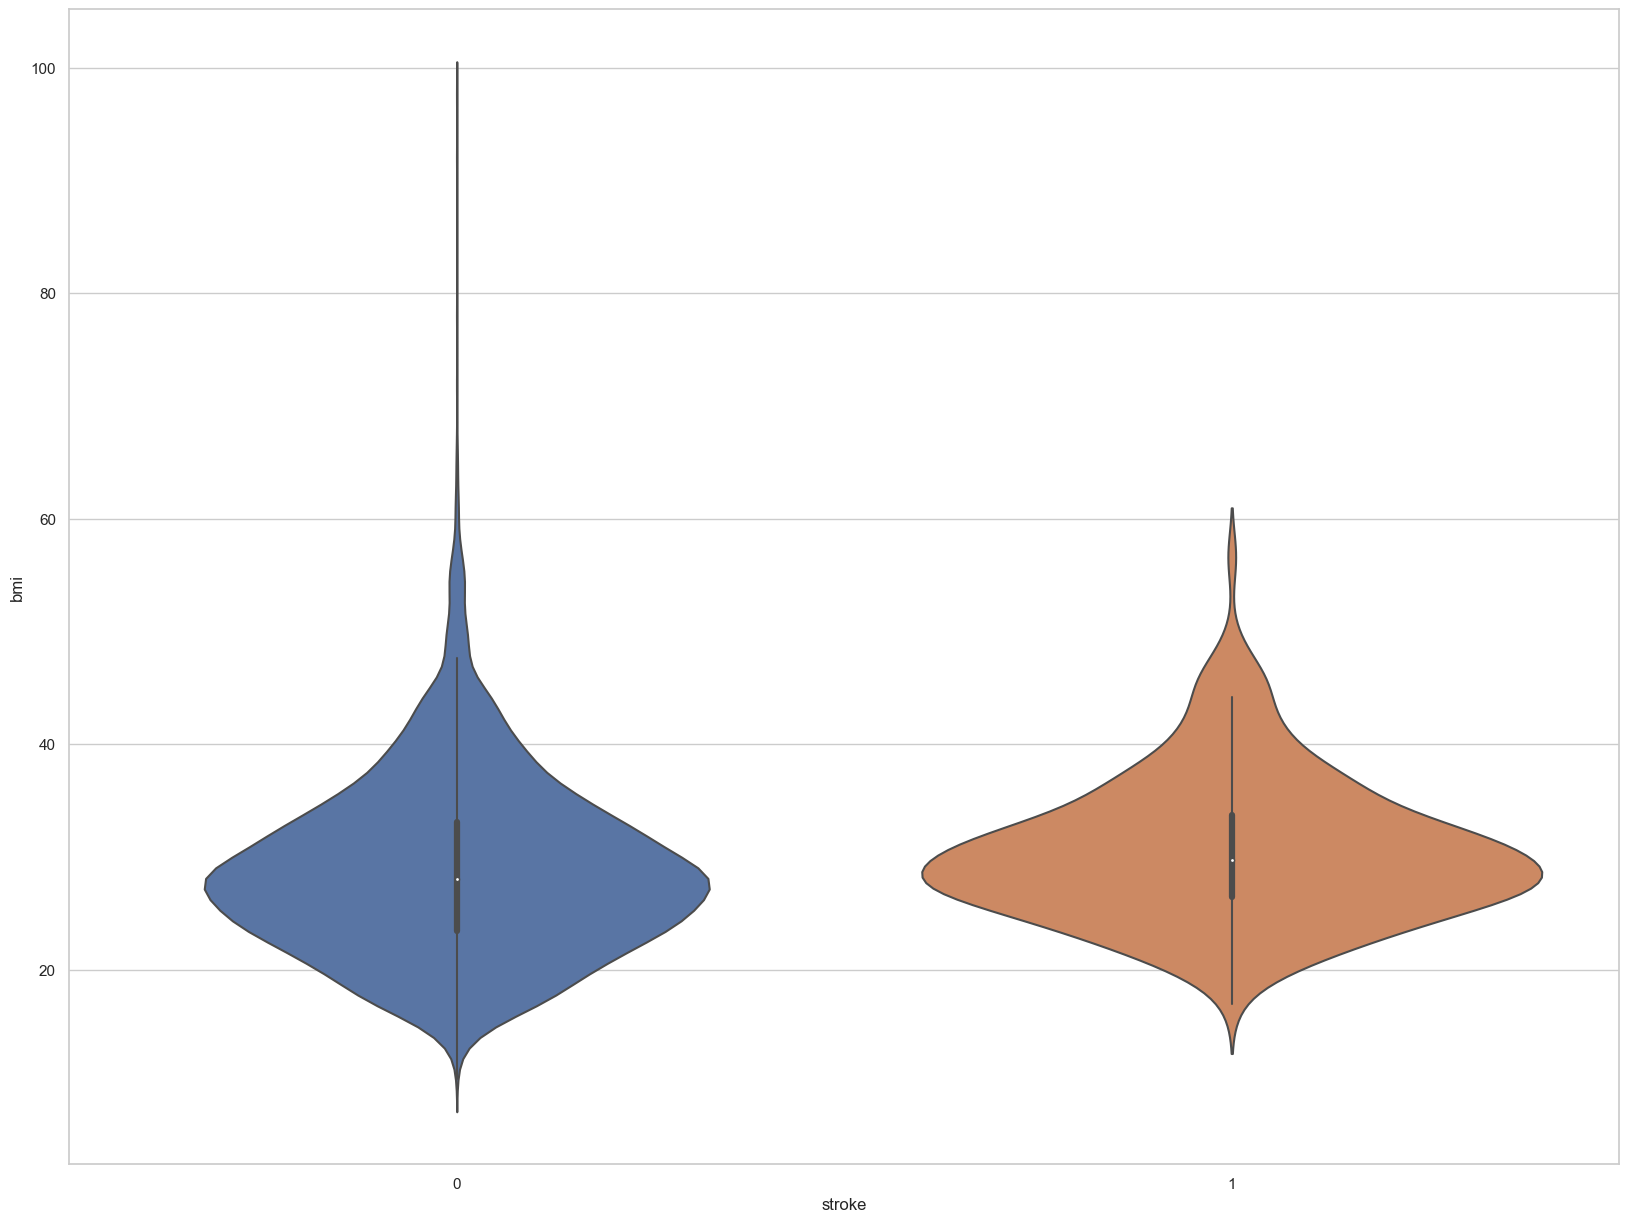

In [38]:
f = plt.figure(figsize=(20,15))
sb.violinplot(x='stroke',y='bmi',data=data)
plt.show()

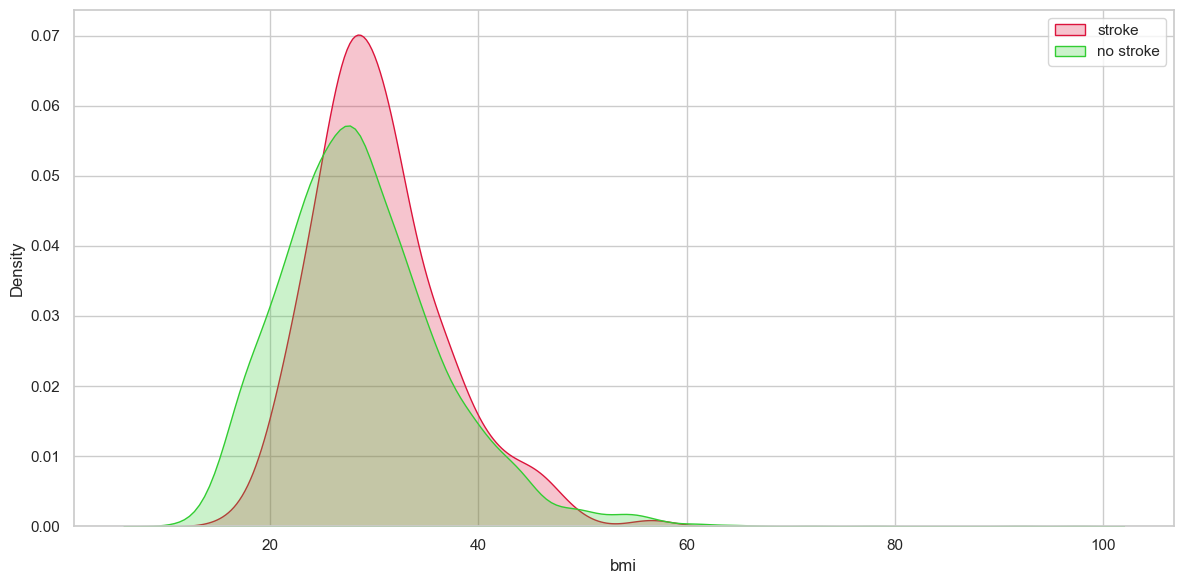

In [39]:
#Looking at proportion of bmi with stroke
fig, ax = plt.subplots(figsize=(12, 6))
sb.kdeplot(data=data[data.stroke==1], x='bmi',
            color='crimson', label='stroke', fill=True, ax=ax)
sb.kdeplot(data=data[data.stroke==0], x='bmi',
            color='limegreen', label='no stroke', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

# Observations on BMI levels
The violinplots for both stroke and without stroke are very similar in shape, which means that the distribution of data is similar across patients with varying BMI levels, and there might not be a very significant difference between the BMI levels of patients who have stroke vs those who do not

<Figure size 2000x800 with 0 Axes>

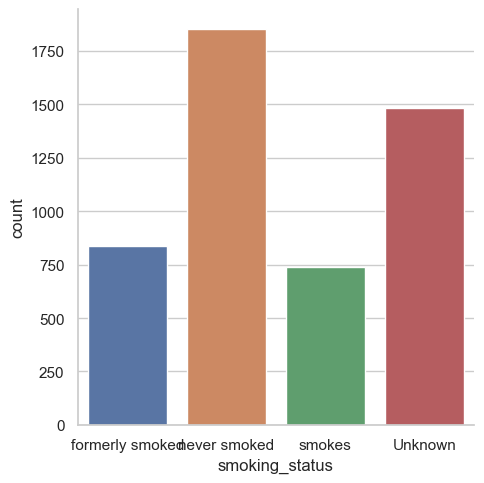

In [40]:
f = plt.figure(figsize=(20,8))
sb.catplot(x='smoking_status',data=data,kind="count")
plt.show()

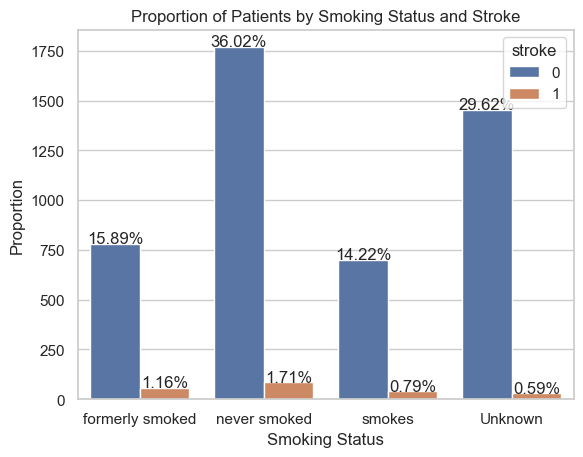

In [41]:
sb.set(style="whitegrid")
total = float(len(data))
ax = sb.countplot(x="smoking_status", hue="stroke", data=data)
ax.set_title("Proportion of Patients by Smoking Status and Stroke")
ax.set_xlabel("Smoking Status")
ax.set_ylabel("Proportion")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format(height/total*100),
            ha="center")

plt.show()

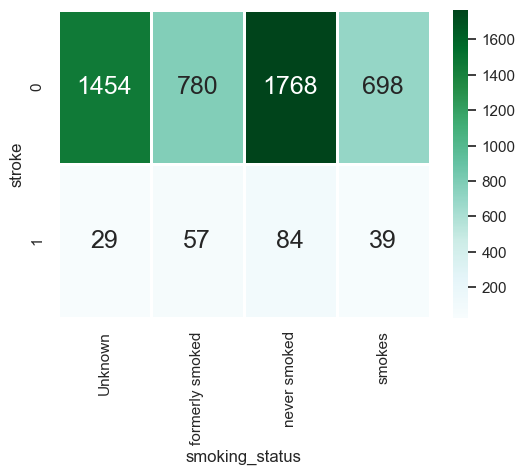

In [42]:
#Comparing smoking status with stroke
f = plt.figure(figsize=(6, 4))
sb.heatmap(data.groupby(['stroke', 'smoking_status']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.show()

# Observations on smoking status
There is a higher proportion of patients who smoke (both current and former) and suffer from a stroke compared to those who do not smoke.

# Relationship between variables

In [43]:
df = pd.DataFrame(data)

# group by the categorical variable and obtain summary statistics
grouped_data = df.groupby('heart_disease')
summary_statistics = grouped_data['age'].describe()

print(summary_statistics)

                count       mean        std   min   25%   50%   75%   max
heart_disease                                                            
0              4666.0  41.542032  22.197724  0.08  24.0  43.0  59.0  82.0
1               243.0  68.275720  11.706205  2.00  61.0  71.0  78.0  82.0


Overall, patients with heart disease tends to be older in age

In [44]:
df = pd.DataFrame(data)

# group by the categorical variable and obtain summary statistics
grouped_data = df.groupby('hypertension')
summary_statistics = grouped_data['age'].describe()

print(summary_statistics)

               count       mean        std    min   25%   50%   75%   max
hypertension                                                             
0             4458.0  40.896842  22.328878   0.08  23.0  42.0  58.0  82.0
1              451.0  62.323725  13.877298  17.00  53.0  63.0  74.0  82.0


Overall, patients with hypertension tends to be older in age.

In [45]:
df = pd.DataFrame(data)

# group by the categorical variable and obtain summary statistics
grouped_data = df.groupby('smoking_status')
summary_statistics = grouped_data['Residence_type'].describe()

print(summary_statistics)

                count unique    top freq
smoking_status                          
Unknown          1483      2  Urban  745
formerly smoked   837      2  Urban  430
never smoked     1852      2  Rural  938
smokes            737      2  Urban  401


Overall, patients who smoke (former and current) tend to be from urban areas compared to those who do not smoke

In [46]:
df = pd.DataFrame(data)

# group by the categorical variable and obtain summary statistics
grouped_data = df.groupby('ever_married')
summary_statistics = grouped_data['bmi'].describe()

print(summary_statistics)

               count       mean       std   min   25%   50%   75%   max
ever_married                                                           
No            1705.0  25.214721  7.783018  10.3  19.5  23.5  29.0  97.6
Yes           3204.0  30.850749  7.159654  11.3  26.1  29.6  34.4  92.0


Overall, patients who were ever married have a slightly higher BMI than those who were never married

In [47]:
df = pd.DataFrame(data)

# group by the categorical variable and obtain summary statistics
grouped_data = df.groupby('work_type')
summary_statistics = grouped_data['age'].describe()

print(summary_statistics)

                count       mean        std    min    25%   50%   75%   max
work_type                                                                  
Govt_job        630.0  50.717460  15.300057  14.00  40.00  51.0  62.0  82.0
Never_worked     22.0  16.181818   2.342899  13.00  14.25  16.0  17.0  23.0
Private        2811.0  45.203842  18.364985   8.00  30.00  45.0  59.0  82.0
Self-employed   775.0  59.916129  17.003554   7.00  48.00  62.0  75.0  82.0
children        671.0   6.877973   4.536291   0.08   2.00   7.0  11.0  16.0


Overall, self-employed individuals tend to be older compared to other categories of work type

# One Hot Encoding

We use OneHotEncoding to encode categorical variables into its numeric values. There are 7 categorical variables that needed to be encoded.

In [48]:
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
data_cat = data[['ever_married','work_type','Residence_type','smoking_status','gender','hypertension','heart_disease']]
ohe.fit(data_cat)
data_cat_ohe = pd.DataFrame(ohe.transform(data_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(data_cat.columns))

# Check the encoded variables
data_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ever_married_No                 4909 non-null   float64
 1   ever_married_Yes                4909 non-null   float64
 2   work_type_Govt_job              4909 non-null   float64
 3   work_type_Never_worked          4909 non-null   float64
 4   work_type_Private               4909 non-null   float64
 5   work_type_Self-employed         4909 non-null   float64
 6   work_type_children              4909 non-null   float64
 7   Residence_type_Rural            4909 non-null   float64
 8   Residence_type_Urban            4909 non-null   float64
 9   smoking_status_Unknown          4909 non-null   float64
 10  smoking_status_formerly smoked  4909 non-null   float64
 11  smoking_status_never smoked     4909 non-null   float64
 12  smoking_status_smokes           49

In [49]:
data_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ever_married_No                 4909 non-null   float64
 1   ever_married_Yes                4909 non-null   float64
 2   work_type_Govt_job              4909 non-null   float64
 3   work_type_Never_worked          4909 non-null   float64
 4   work_type_Private               4909 non-null   float64
 5   work_type_Self-employed         4909 non-null   float64
 6   work_type_children              4909 non-null   float64
 7   Residence_type_Rural            4909 non-null   float64
 8   Residence_type_Urban            4909 non-null   float64
 9   smoking_status_Unknown          4909 non-null   float64
 10  smoking_status_formerly smoked  4909 non-null   float64
 11  smoking_status_never smoked     4909 non-null   float64
 12  smoking_status_smokes           49

In [50]:
# Combining Numeric features with the OHE Categorical features
data_num = data[['age','avg_glucose_level','bmi']]
data_res = data['stroke']
data_ohe = pd.concat([data_num, data_cat_ohe, data_res], 
                           sort = False, axis = 1).reindex(index=data_num.index)

# Check the final dataframe
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4909 non-null   float64
 1   avg_glucose_level               4909 non-null   float64
 2   bmi                             4909 non-null   float64
 3   ever_married_No                 4717 non-null   float64
 4   ever_married_Yes                4717 non-null   float64
 5   work_type_Govt_job              4717 non-null   float64
 6   work_type_Never_worked          4717 non-null   float64
 7   work_type_Private               4717 non-null   float64
 8   work_type_Self-employed         4717 non-null   float64
 9   work_type_children              4717 non-null   float64
 10  Residence_type_Rural            4717 non-null   float64
 11  Residence_type_Urban            4717 non-null   float64
 12  smoking_status_Unknown          47

In [51]:
data_ohe = data_ohe.fillna(0)
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4909 non-null   float64
 1   avg_glucose_level               4909 non-null   float64
 2   bmi                             4909 non-null   float64
 3   ever_married_No                 4909 non-null   float64
 4   ever_married_Yes                4909 non-null   float64
 5   work_type_Govt_job              4909 non-null   float64
 6   work_type_Never_worked          4909 non-null   float64
 7   work_type_Private               4909 non-null   float64
 8   work_type_Self-employed         4909 non-null   float64
 9   work_type_children              4909 non-null   float64
 10  Residence_type_Rural            4909 non-null   float64
 11  Residence_type_Urban            4909 non-null   float64
 12  smoking_status_Unknown          49

In [52]:
data_ohe.to_csv('cleaned-dataset-ohe.csv',index=False)

# Creating Models To Predict Stroke

# Logistic Regression

In [91]:
import warnings
warnings.filterwarnings('ignore')

In [92]:
y = pd.DataFrame(data_ohe['stroke']) # target variable
X = pd.DataFrame(data_ohe.drop('stroke', axis = 1)) # features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

params_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
}

gridCV = GridSearchCV(LogisticRegression(), param_grid=params_lr, scoring='f1')

gridCV.fit(X_train, y_train)

print(gridCV.best_params_)

{'C': 1, 'penalty': 'l2'}


In [93]:
# instantiate the model (using the optimal parameters)
logreg = LogisticRegression(C=1,penalty='l2')

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

Logistic Regression
Test Data
Accuracy  :	 0.9562118126272913
F1 score: 	 0.12244897959183673

TPR Test :	 0.06976744186046512
TNR Test :	 0.9968051118210862

FPR Test :	 0.003194888178913738
FNR Test :	 0.9302325581395349


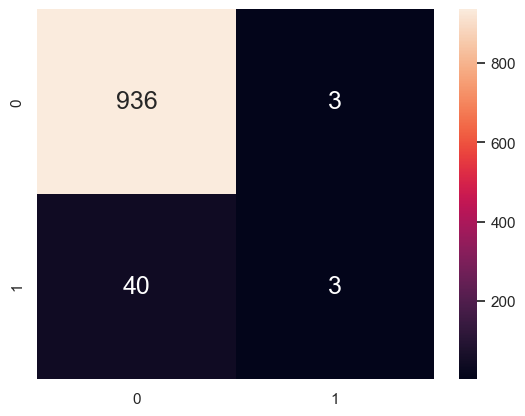

In [94]:
# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

print("Logistic Regression")
print("Test Data")
print("Accuracy  :\t", accuracy_score(y_test, y_pred))
print("F1 score: \t", f1_score(y_test,y_pred))
print()
print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()
print("FPR Test :\t", (fpTest/(tnTest + fpTest)))
print("FNR Test :\t", (fnTest/(tpTest + fnTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

In [95]:
target_names = ['no stroke', 'stroke']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   no stroke       0.96      1.00      0.98       939
      stroke       0.50      0.07      0.12        43

    accuracy                           0.96       982
   macro avg       0.73      0.53      0.55       982
weighted avg       0.94      0.96      0.94       982



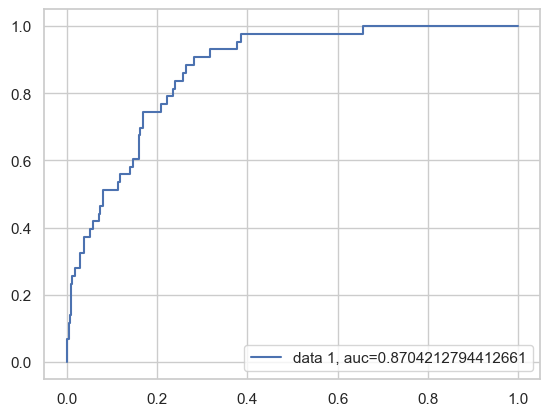

In [96]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

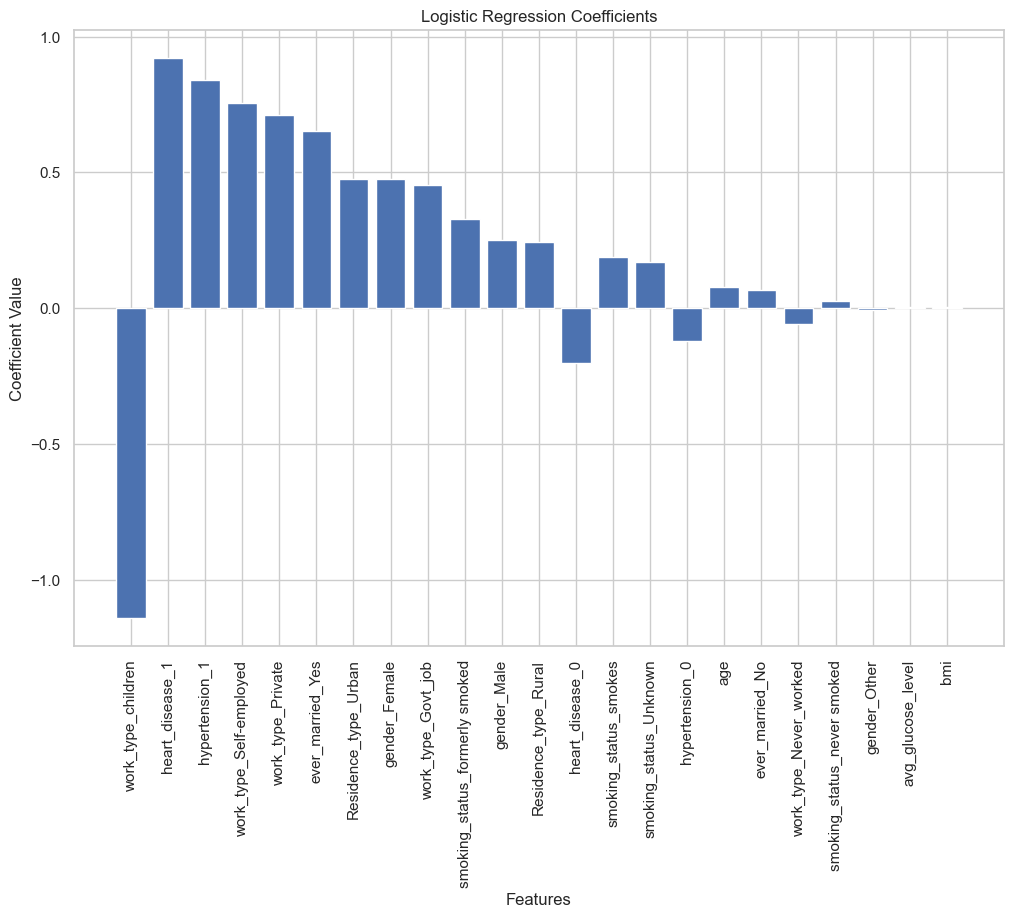

In [97]:
#feature importance 
#LR
lr = LogisticRegression(C=1,penalty='l2')
lr.fit(X_train, y_train)

# Get feature coefficients
coef = lr.coef_[0]

# Sort coefficients in descending order and get feature names
features = X.columns
coef_dict = {feat: coef for feat, coef in zip(features, coef)}
sorted_coef_dict = dict(sorted(coef_dict.items(), key=lambda x: -abs(x[1])))


#for feat, coef in sorted_coef_dict.items():
#    print(f"{feat}: {coef}")

plt.figure(figsize=(12,8))
plt.bar(sorted_coef_dict.keys(), sorted_coef_dict.values())
plt.xticks(rotation=90)
plt.title("Logistic Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()

## Insights from Logistic Regression

Accuracy = 0.9562118126272913 <br>
F1 Score = 0.12244897959183673 <br>
FNR Test :	 0.9302325581395349 <br>

Althought the accuracy from logistic regression seems to be high, the F1 score is very low, indicating that the model is not performing well. Furthermore, the False Negative Rate is extremely high. And in our case of predicting stroke,  it means that predicting a patient has no stroke but the patient has a stroke. Hence, this model on logistic regression might not be the most ideal for our problem statement.

# Creating and fitting a classification model

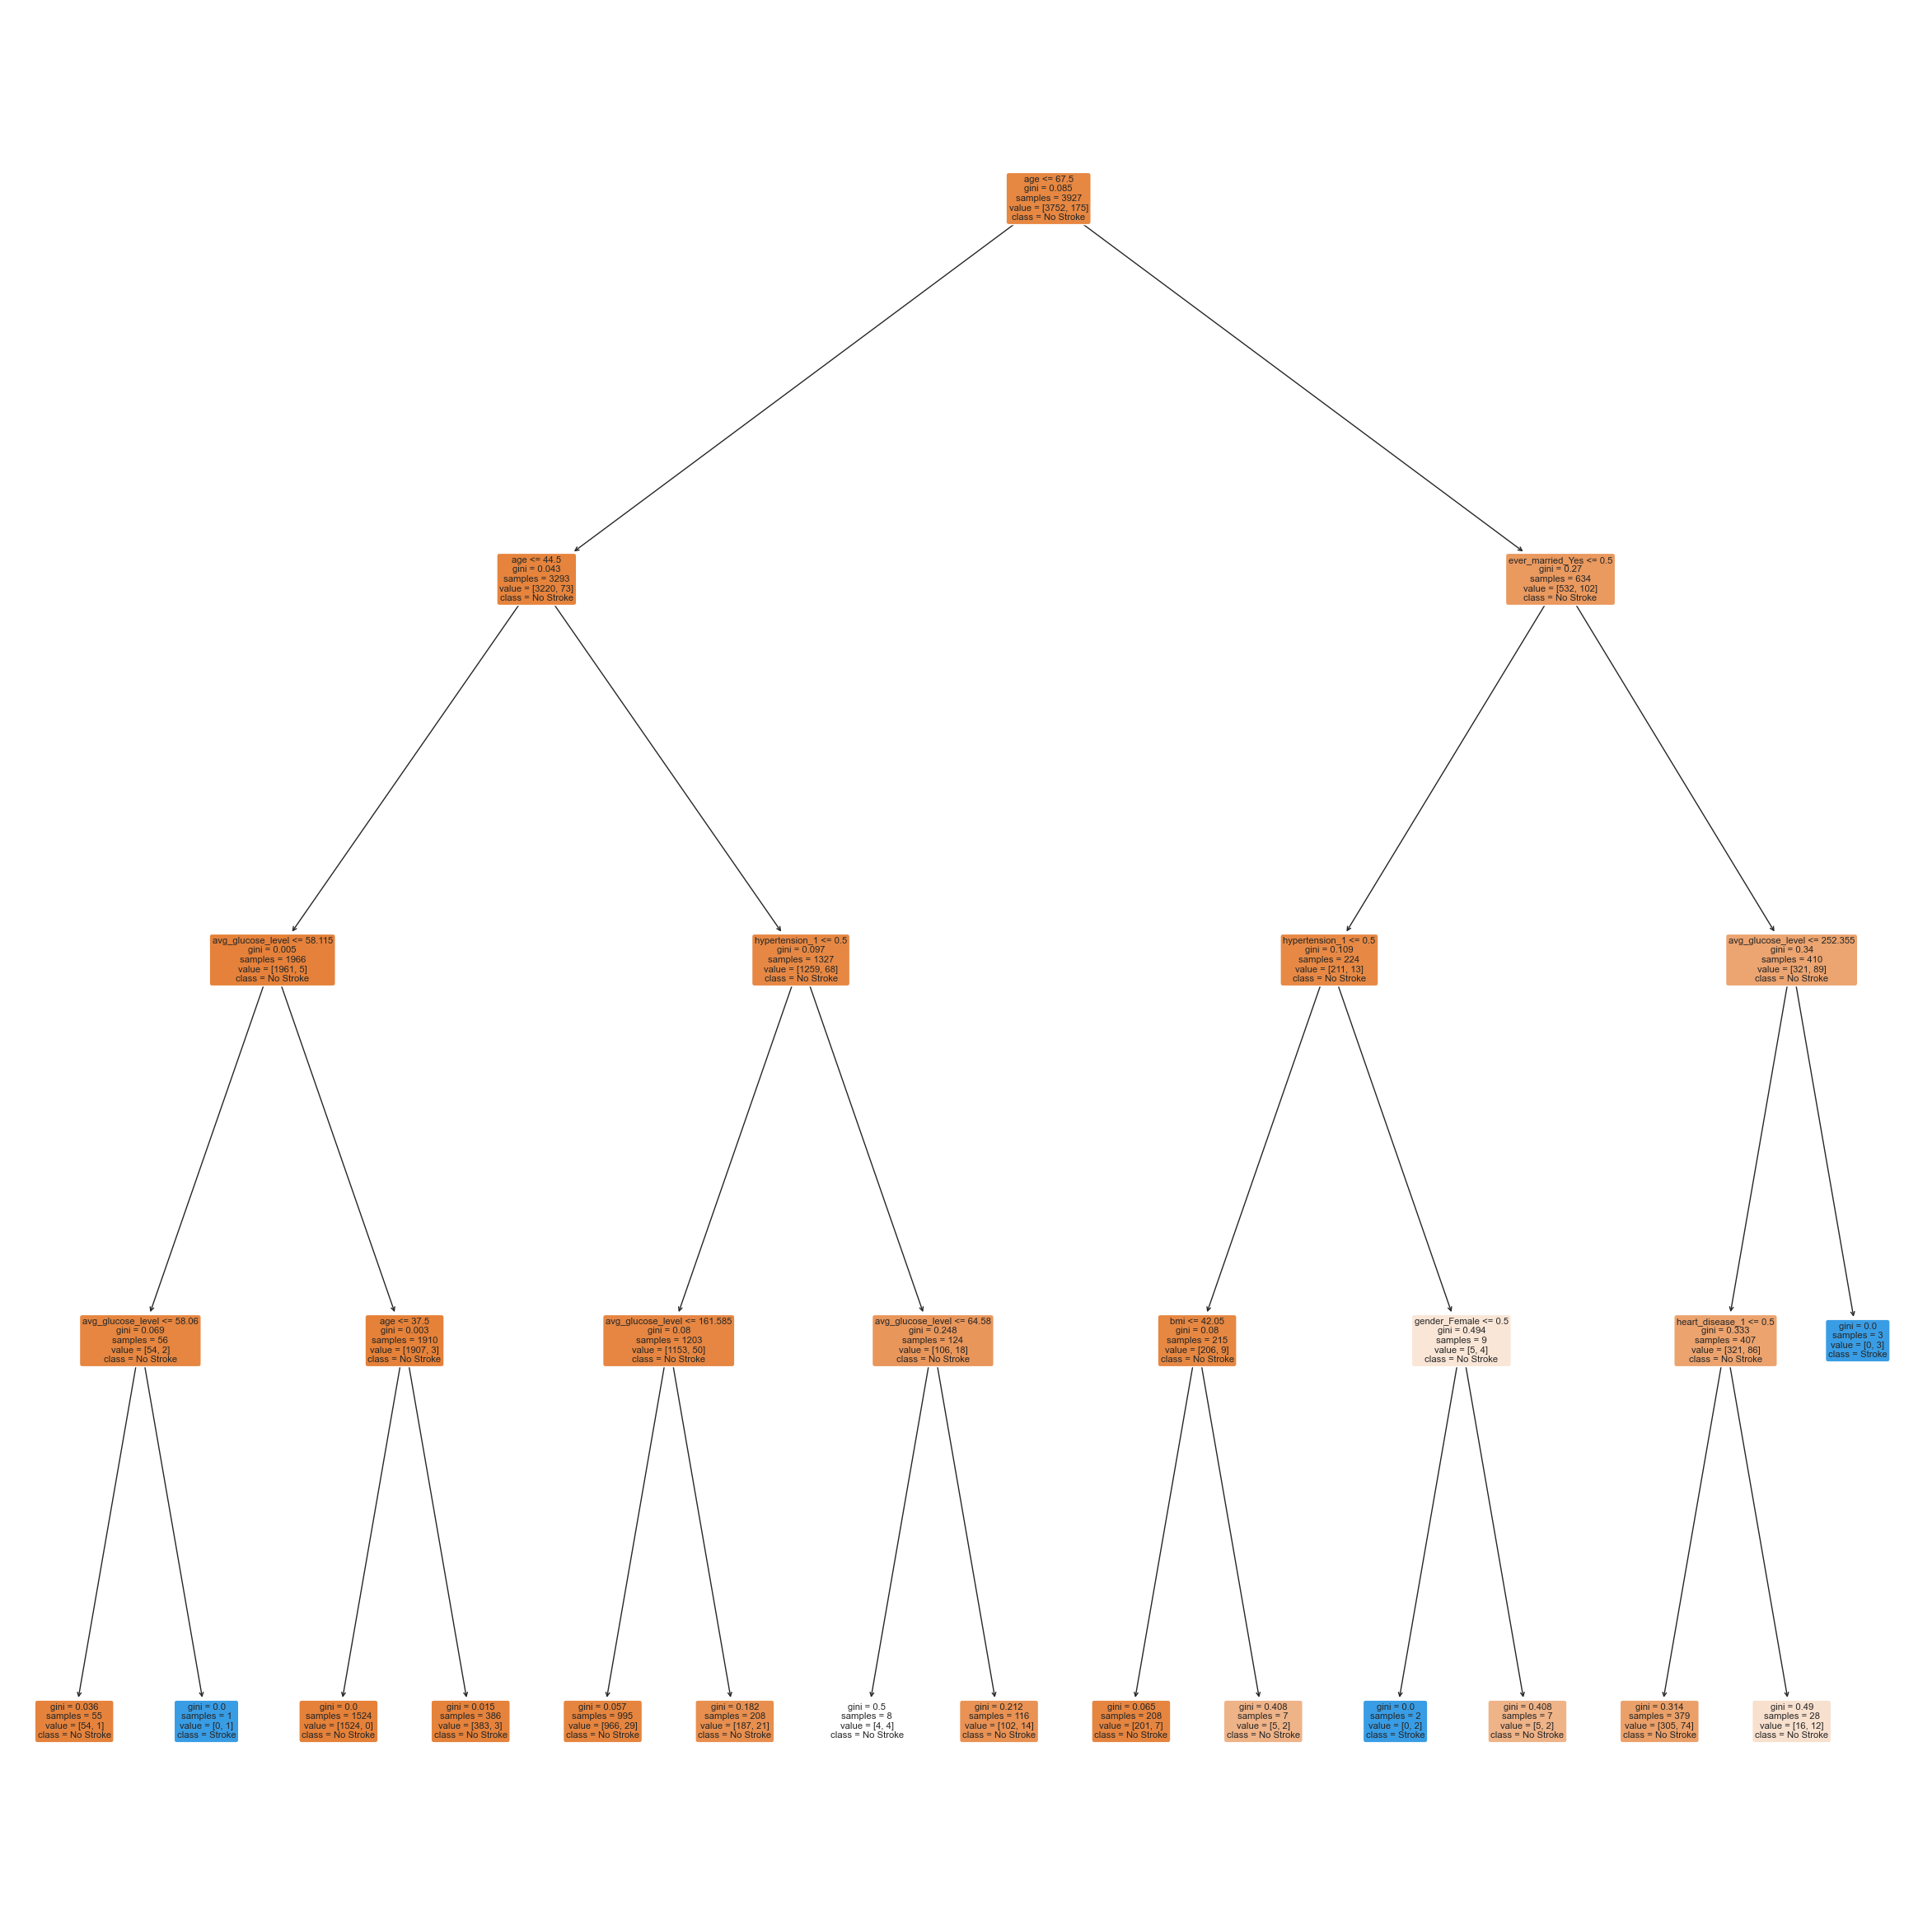

In [59]:
# Extract Response and Predictors
y = pd.DataFrame(data_ohe['stroke'])
X = pd.DataFrame(data_ohe.drop('stroke', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(30,30))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No Stroke","Stroke"])
plt.show()

# Checking the accuracy of the model

Classification accuracy and all other accuracy measures from Confusion Matrix.

Train Data
Accuracy  :	 0.9569646040234275

TPR Train :	 0.03428571428571429
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.9657142857142857


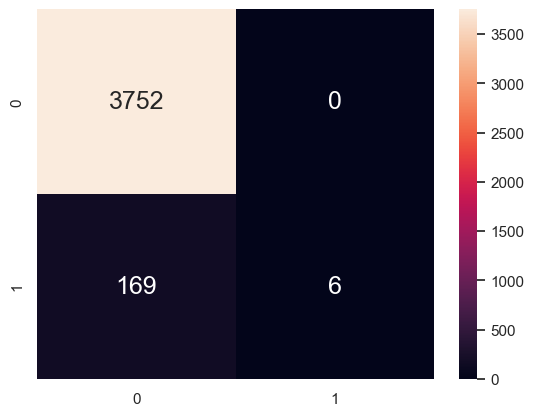

In [60]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1]
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

Test Data
Accuracy  :	 0.9653767820773931

TPR Test :	 0.029411764705882353
TNR Test :	 0.9989451476793249

FPR Test :	 0.0010548523206751054
FNR Test :	 0.9705882352941176


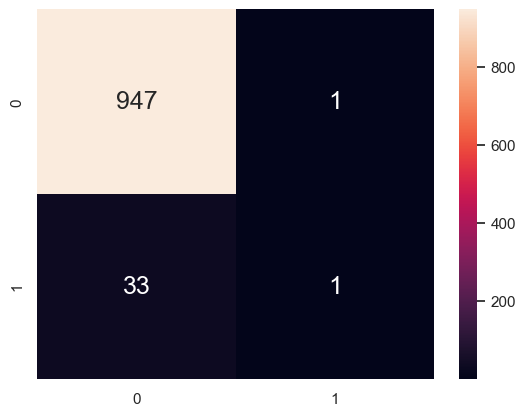

In [61]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

# Insights

Although the classification accuracy of train and test data seem relatively high, it is misleading because there is a very high false negative rate, which is the model predicting a patient has no stroke but the patient has a stroke. This results from the large 'No Stroke' vs 'Stroke' class imbalance. This leads to the model predicting 'No Stroke' majority of the time for a given patient. This model can be further improved by rectifying the class imbalance

# Balance the class imbalance of 'Stroke' vs 'No Stroke'

In [62]:
dataStroke = data_ohe[data_ohe.stroke == 1]
dataNoStroke = data_ohe[data_ohe.stroke == 0]
 
dataStroke_up = resample(dataStroke, 
                        replace=True,                     # sample with replacement
                        n_samples=dataNoStroke.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
data_ohe_up = pd.concat([dataStroke_up, dataNoStroke])
 
# Check the ratio of the classes
data_ohe_up['stroke'].value_counts()

1.0    4700
0.0    4700
Name: stroke, dtype: int64

In [63]:
data_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9400 entries, 114 to 5109
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             9400 non-null   float64
 1   avg_glucose_level               9400 non-null   float64
 2   bmi                             9400 non-null   float64
 3   ever_married_No                 9400 non-null   float64
 4   ever_married_Yes                9400 non-null   float64
 5   work_type_Govt_job              9400 non-null   float64
 6   work_type_Never_worked          9400 non-null   float64
 7   work_type_Private               9400 non-null   float64
 8   work_type_Self-employed         9400 non-null   float64
 9   work_type_children              9400 non-null   float64
 10  Residence_type_Rural            9400 non-null   float64
 11  Residence_type_Urban            9400 non-null   float64
 12  smoking_status_Unknown          

In [64]:
data_ohe_up.to_csv('cleaned-dataset-ohe-up.csv',index=False)

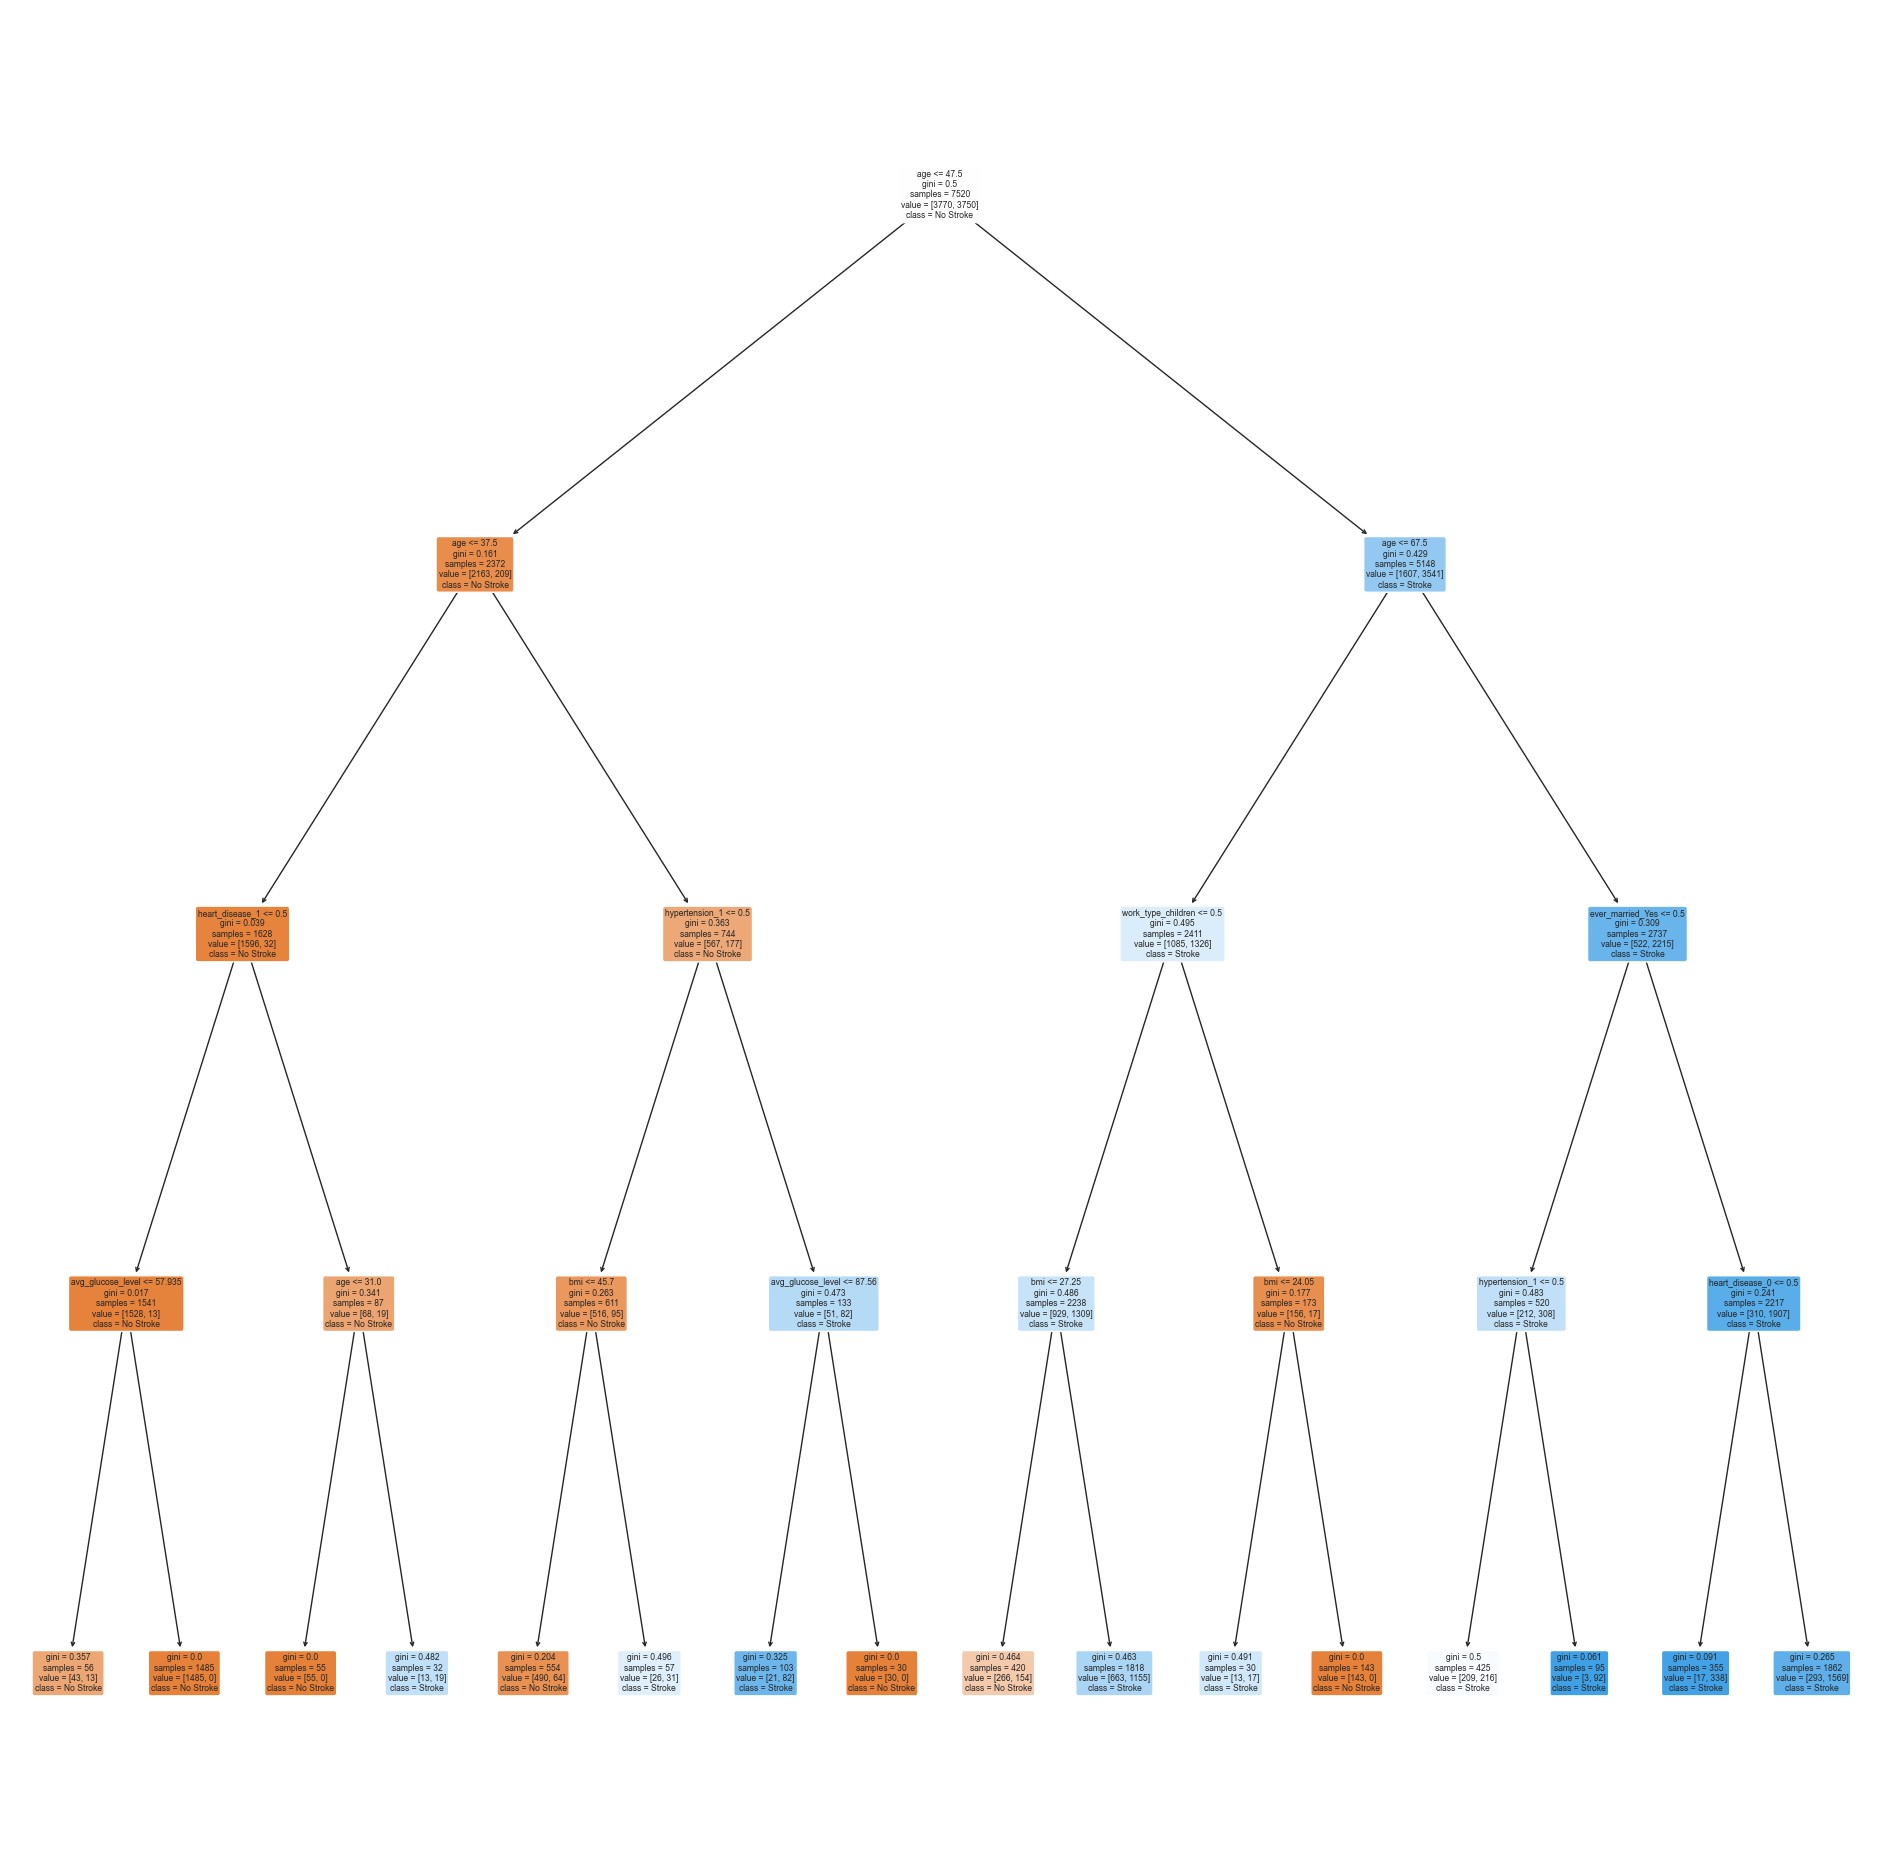

In [65]:
# Extract Response and Predictors
y = pd.DataFrame(data_ohe_up['stroke'])
X = pd.DataFrame(data_ohe_up.drop('stroke', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No Stroke","Stroke"])
plt.show()

# Checking the accuracy of the model

Classification accuracy and all other accuracy measures from Confusion Matrix.

Train Data
Accuracy  :	 0.8019946808510638

TPR Train :	 0.9384
TNR Train :	 0.6663129973474801

FPR Train :	 0.3336870026525199
FNR Train :	 0.0616


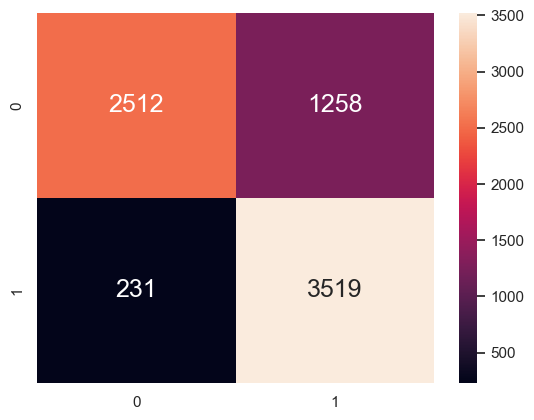

In [66]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

Test Data
Accuracy  :	 0.7872340425531915

TPR Test :	 0.9410526315789474
TNR Test :	 0.6301075268817204

FPR Test :	 0.36989247311827955
FNR Test :	 0.05894736842105263


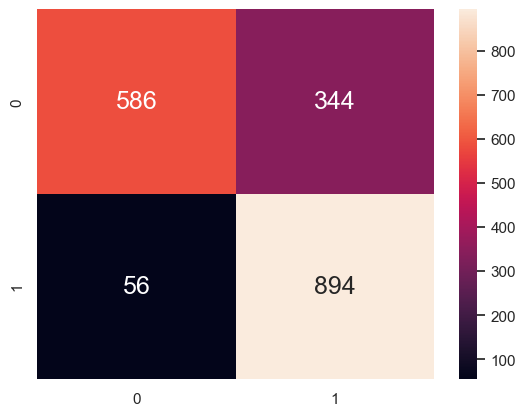

In [67]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

# Insights

Based on train and test data, it seems that the False Positive Rates is still relatively high at about 25%. This model can be further improved

# Implementing random forest 

Random Forest uses an ensemble of trees for better classification.

In [68]:
# Extract Response and Predictors
y = pd.DataFrame(data_ohe_up['stroke'])
X = pd.DataFrame(data_ohe_up.drop('stroke', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [69]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.stroke.ravel())

RandomForestClassifier(max_depth=4)

Train Data
Accuracy  :	 0.8158244680851063

TPR Train :	 0.8676470588235294
TNR Train :	 0.7645502645502645

FPR Train :	 0.23544973544973544
FNR Train :	 0.1323529411764706


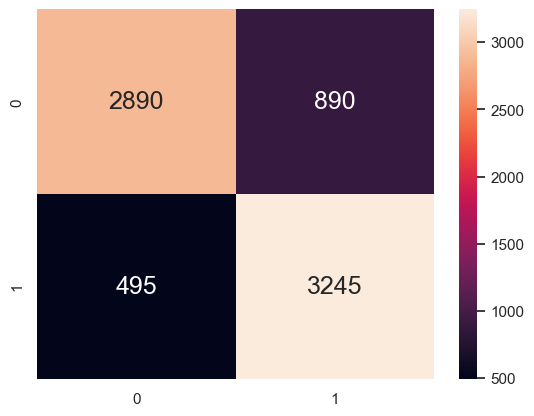

In [70]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

Test Data
Accuracy  :	 0.825

TPR Test :	 0.859375
TNR Test :	 0.7891304347826087

FPR Test :	 0.2108695652173913
FNR Test :	 0.140625


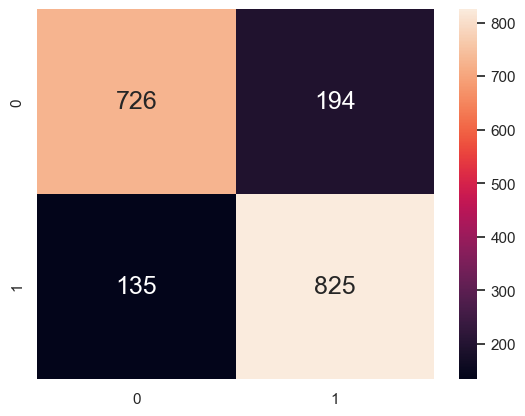

In [71]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

# Insights

By implementing Random Forest classification, it seems that the classification accuracy improves slightly. However, there is still a trend of relatively high False Positive Rates across Model 2 and 3. The random forest tree can be further improved by increasing the number of trees and its maximum depth.

In [72]:
# Extract Response and Predictors
y = pd.DataFrame(data_ohe_up['stroke'])
X = pd.DataFrame(data_ohe_up.drop('stroke', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # CHANGE AND EXPERIMENT
                                 max_depth = 10)       # CHANGE AND EXPERIMENT

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.stroke.ravel())

RandomForestClassifier(max_depth=10, n_estimators=1000)

Train Data
Accuracy  :	 0.9536474164133738

TPR Train :	 0.9921331316187595
TNR Train :	 0.9148091603053435

FPR Train :	 0.08519083969465649
FNR Train :	 0.007866868381240545


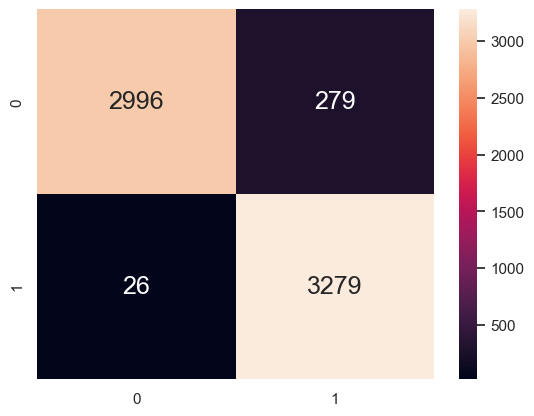

In [73]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

Test Data
Accuracy  :	 0.9386524822695036

TPR Test :	 0.989247311827957
TNR Test :	 0.8891228070175439

FPR Test :	 0.11087719298245614
FNR Test :	 0.010752688172043012


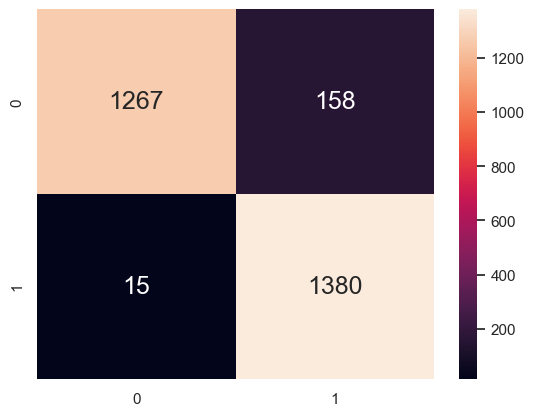

In [74]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

# Insights

The classification accuracy of increased decision trees and depth of decision trees has led to a high increase in classification accuracy of around 95%. However, doing so may lead to overfitting of data due to the complexity of the model, which leads to poor generalisation of unseen data. The model may be further improved by fine tuning the number of decision trees and the depth of each tree, to obtain the ideal number

In [75]:
# Extract Response and Predictors
y = pd.DataFrame(data_ohe_up['stroke'])
X = pd.DataFrame(data_ohe_up.drop('stroke', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [76]:
# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.stroke.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [77]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=10, n_estimators=900)
0.9414893617021278


In [78]:
# Extract Response and Predictors
y = pd.DataFrame(data_ohe_up['stroke'])
X = pd.DataFrame(data_ohe_up.drop('stroke', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 900,   # found using GridSearchCV
                                 max_depth = 10)       # found using GridSearchCV

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.stroke.ravel())

RandomForestClassifier(max_depth=10, n_estimators=900)

Train Data
Accuracy  :	 0.9559840425531915

TPR Train :	 0.9957219251336898
TNR Train :	 0.9166666666666666

FPR Train :	 0.08333333333333333
FNR Train :	 0.0042780748663101605


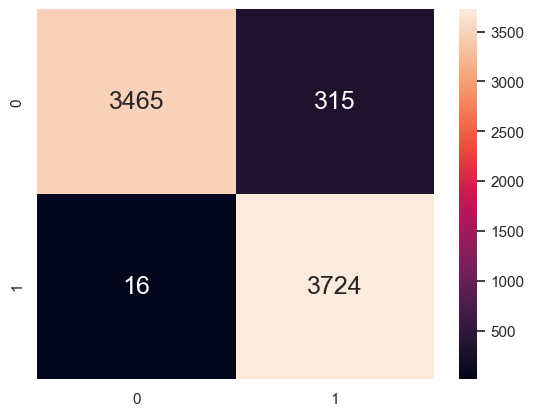

In [79]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

Test Data
Accuracy  :	 0.95

TPR Test :	 0.996875
TNR Test :	 0.9010869565217391

FPR Test :	 0.09891304347826087
FNR Test :	 0.003125
F1 score :	 0.9531872509960159


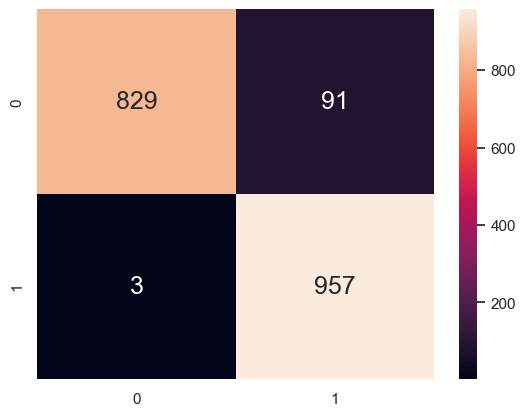

In [80]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))
precision = tpTest/(tpTest+fpTest)
recall = tpTest/(tpTest+fnTest)
f1 = 2*(precision*recall)/(precision+recall)
print("F1 score :\t",f1)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

# Insights from fine tuned random forest tree
As shown in the train and test data, the classification accuracy is still relatively high. Notably, the False Positive Rates have reduced significantly compared to the previous models. From here, we want to investigate what are the most important factors in predicting whether a particular has a likelihood to have a stroke

In [81]:
%matplotlib inline
rforest.estimators_

[DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                        random_state=767092767),
 DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                        random_state=1144663615),
 DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                        random_state=1162342497),
 DecisionTreeClassifier(max_depth=10, max_features='sqrt', random_state=72687585),
 DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                        random_state=2018381750),
 DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                        random_state=1798332457),
 DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                        random_state=1905767424),
 DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                        random_state=936495580),
 DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                        random_state=1781528639),
 DecisionTreeClassifier(max_depth=10, max_featu

In [82]:
len(rforest.estimators_)

900

To visualise how the tree would look like, we would print one instance of a random forest tree out of the 900 trees.

In [83]:
f = plt.figure(figsize=(100,100))
tree.plot_tree(rforest.estimators_[0],filled=True)
plt.show()

# Note
Note that the diagram readability is affected heavily due to the depth of the tree. The figure is only for a visual representation of how a random forest tree would look like, in contrast to the normal binary decision tree.

In [84]:
data_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9400 entries, 114 to 5109
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             9400 non-null   float64
 1   avg_glucose_level               9400 non-null   float64
 2   bmi                             9400 non-null   float64
 3   ever_married_No                 9400 non-null   float64
 4   ever_married_Yes                9400 non-null   float64
 5   work_type_Govt_job              9400 non-null   float64
 6   work_type_Never_worked          9400 non-null   float64
 7   work_type_Private               9400 non-null   float64
 8   work_type_Self-employed         9400 non-null   float64
 9   work_type_children              9400 non-null   float64
 10  Residence_type_Rural            9400 non-null   float64
 11  Residence_type_Urban            9400 non-null   float64
 12  smoking_status_Unknown          

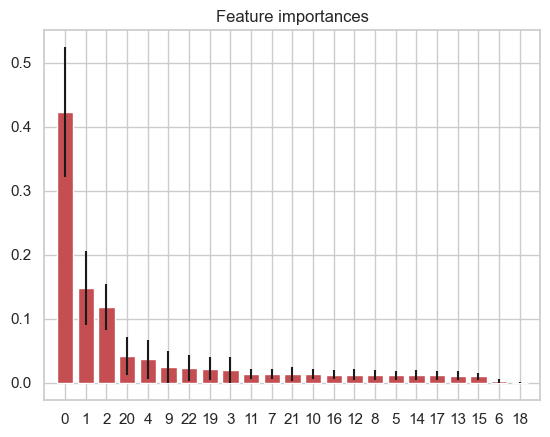

In [85]:
importances = rforest.feature_importances_
std = np.std([tree.feature_importances_ for tree in rforest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Insights from optimised parameters in Random Forest 
From the bar chart above, the features are sorted in descending order to highlight the most important features. Based on the bar chart, the top 3 factors in affecting stroke are features 0,1,2. With reference to the features list above, they correspond to age, average glucose level and BMI. Hence, from performing random forest and fine tuning the parameters, we can find out the most important factors that relates to having a stroke. 

# Implementing Artifical Neural Network

We will be using MLPClassifier from Sci-kit learn library to implement an artificial neural network. Multilayer perceptron (MLP) algorithm is a class of feedforward neural network used for classification such as in this case.

In [86]:
train, test = train_test_split(data_ohe_up, random_state = 42)
X_train = train[train.columns[0:21]]
y_train = train['stroke']
X_test = test[test.columns[0:21]]
y_test = test['stroke']

In [87]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
MLP = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter = 1000)
MLP.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [89]:
predictions = MLP.predict(X_test)

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92      1179
         1.0       0.88      1.00      0.93      1171

    accuracy                           0.93      2350
   macro avg       0.94      0.93      0.93      2350
weighted avg       0.94      0.93      0.93      2350



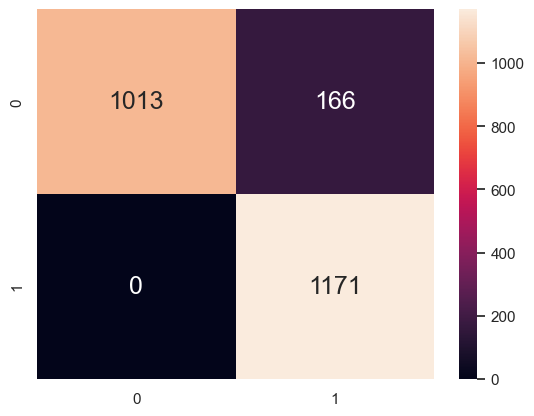

In [90]:
sb.heatmap(confusion_matrix(y_test, predictions), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
print(classification_report(y_test,predictions))

## Insights from using MLPClassifier
From our findings, we can see that we achieved a relatively high accuracy and f1-score. We can actually still refine the model by increasing input layers, neurons per layer as well as the iteration numbers to achieve a better result although at a higher computational cost and time. From this model, one drawback is that finding the right parameters has to be done iteratively, and therefore could result in lower efficiency when fine-tuning to achieve the best accuracy.
